### Title of the Project :-
## PREDICTING NEW CAR PRICES($) IN THE US MARKET…

- A new car manufacturer company is looking to set up business in the US Market. They need to know the factors on which the pricing of a car depends on, to take on their competition in the market.

- Build an ML model to predict the price of a car, the company will then use the model to configure the price of a car according to its features or configure the features according to its price.

### Importing libraries :

In [1]:
import re
import numpy as np
import pandas as pd
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 250)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings 
warnings.filterwarnings('ignore')

C:\Users\Vishal\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Importing dataset :

In [2]:
df = pd.read_csv('New_cars_price.csv')

In [3]:
df.head()

,Model,MSRP,EPA Fuel Economy Est - City (MPG),Engine,EPA Classification,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,Transmission,Base Curb Weight (lbs),Passenger Volume (ft³),Wheelbase (in),"Track Width, Front (in)","Height, Overall (in)","Fuel Tank Capacity, Approx (gal)",SAE Net Torque @ RPM,Fuel System,SAE Net Horsepower @ RPM,Displacement,Trans Description Cont.,Trans Type,Brake Type,Steering Type,Suspension Type - Front,Suspension Type - Rear,Air Bag-Frontal-Driver,Air Bag-Frontal-Passenger,Air Bag-Passenger Switch (On/Off),Air Bag-Side Body-Front,Air Bag-Side Body-Rear,Air Bag-Side Head-Front,Air Bag-Side Head-Rear,Brakes-ABS,Child Safety Rear Door Locks,Daytime Running Lights,Traction Control,Night Vision,Rollover Protection Bars,Fog Lamps,Parking Aid,Tire Pressure Monitor,Back-Up Camera,Stability Control,Basic Miles/km,Basic Years,Corrosion Miles/km,Corrosion Years,Drivetrain Miles/km,Drivetrain Years,Turning Diameter - Curb to Curb (ft),Front Wheel Material,Front Tire Size,Stabilizer Bar Diameter - Front (in),Roadside Assistance Years,Roadside Assistance Miles/km
0,2019 Acura RDX Specs: FWD w/Technology Pkg,"$40,600",22,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/Technology Pkg,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,3790,104.0,108.3,64.2,65.7,17.1,280 @ 1600,Gasoline Direct Injection,272 @ 6500,2.0 L/122,Automatic w/OD,10,4-Wheel Disc,Rack-Pinion,Strut,Multi-Link,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,"50,000",4.0,Unlimited,5.0,"70,000",6.0,39,Aluminum,P235/55HR19,NaN,4,"50,000"
1,2019 Acura RDX Specs: FWD w/Advance Pkg,"$45,500",22,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/Advance Pkg,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,3829,104.0,108.3,64.2,65.7,17.1,280 @ 1600,Gasoline Direct Injection,272 @ 6500,2.0 L/122,Automatic w/OD,10,4-Wheel Disc,Rack-Pinion,Strut,Multi-Link,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,"50,000",4.0,Unlimited,5.0,"70,000",6.0,39,Aluminum,P235/55HR19,NaN,4,"50,000"
2,2019 Acura RDX Specs: FWD w/A-Spec Pkg,"$43,600",22,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/A-Spec Pkg,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,3821,104.0,108.3,64.2,65.7,17.1,280 @ 1600,Gasoline Direct Injection,272 @ 6500,2.0 L/122,Automatic w/OD,10,4-Wheel Disc,Rack-Pinion,Strut,Multi-Link,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,"50,000",4.0,Unlimited,5.0,"70,000",6.0,39,Aluminum,P255/45VR20,NaN,4,"50,000"
3,2019 Acura RDX Specs: FWD,"$37,400",22,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD,Front Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,3783,104.0,108.3,64.2,65.7,17.1,280 @ 1600,Gasoline Direct Injection,272 @ 6500,2.0 L/122,Automatic w/OD,10,4-Wheel Disc,Rack-Pinion,Strut,Multi-Link,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,"50,000",4.0,Unlimited,5.0,"70,000",6.0,39,Aluminum,P235/55HR19,NaN,4,"50,000"
4,2019 Acura RDX Specs: AWD w/Technology Pkg,"$42,600",21,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 4WD,AWD w/Technology Pkg,All Wheel Drive,5,4,Sport Utility,Transmission: 10-Speed Automatic -inc: sequent...,4026,104.0,108.3,64.2,65.7,17.1,280 @ 1600,Gasoline Direct Injection,272 @ 6500,2.0 L/122,Automatic w/OD,10,4-Wheel Disc,Rack-Pinion,Strut,Multi-Link,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,"50,000",4.0,Unlimited,5.0,"70,000",6.0,39,Aluminum,P235/55HR19,NaN,4,"50,000"


In [4]:
df.shape

(32316, 57)

### FEATURE DESCRIPTION

1. Model - Car model names
2. MRSP - Selling price in dollars (target column)
3. Engine - Type of engine used in car
4. EPA Classification - EPA size classes (Minicompact , Mid size , Compact , Mid-Size , SUV)
5. Style Name - Special features for each model (Drivetrain , Transmission , Roof , Doors , extra features) **
6. Drivetrain - Types of drivetrain(Conveys power from engine to wheels) used (FWD , RWD , AWD , 4WD )
7. Passenger Capacity - Number of people who can be seated
8. Passenger Doors - Number of doors in a car
9. Body Style - Body style of the car
10. Transmission - Type of transmission used. (Not req -- Trans type , Trans Description cont.)
11. Base Curb Weight - Total weight of the vehicle in pounds
12. Passenger Volumne - Volume of space available for passengers
13. Wheelbase - Distance between the centers of the front and rear wheels
14. Track Width Front - Distance between the centerline of two frontwheels
15. Height Overall - Overall height of the car in inches
16. Fuel Tank Capacity,Approx(gal) - Fuel tank capacity in gallon
17. SAE Net Torque @ RPM - Net optimum torque at certain range of RPM
18. Fuel System - Type of fuel injection used in car
19. SAE Net Horsepower @ RPM - Horsepower produced at engine crankshaft(without transmission losses)
20. Displacement - Measure of the cylinder volume swept by all of the pistons (in litres)
21. Trans Description - Type of transmission used in car
22. Trans Type - Number of gears in transmission
23. Brake Type - Type of brake used in car
24. Suspension type Front - Type of suspension used in car front wheels
25. Suspension type Rear - Type of suspension used in car rear wheels
26. Air Bag Frontal Driver - Drivers Airbag(Y/N)
27. Air Bag Frontal Passenger - Front passenger Airbag(Y/N)
28. Air Bag-Side Body-Front - Airbags in front side of the car(Y/N)
29. Air Bag-Side Body-Rear - Airbags in rear side of the car(Y/N)
30. Air Bag Side Head-Front - Side airbags to protect head for front row(Y/N)
31. Air Bag Side Head-Rear - Side airbags to protect head for rear row(Y/N)
32. Brakes -ABS - Is Antilock braking system is present(Y/N)
33. Child Safety Rear Door Locks - Child safety door locks(Y/N)
34. Daytime Running Lights - (Y/N)
35. Traction Control - Is TCS available (Y/N)
36. Night Vision - Thermographic camera to increase a driver's perception in darkness (Y/N)
37. Rollover Protection Bar - Is ROPS present (Y/N)
38. Fog Lamps - Is fog lamps present(Y/N)
39. Parking Aid - Senors to monitor nearby obstacles(Y/N)
40. Tire Pressure Monitor - Y/N
41. Back up Camera - Is reversing camera present (Y/N)
42. Stability Control - Is ECS present (Y/N)
43. Basic Miles/km - Warrany Kms
44. Basic Years - Warranty years
45. Corrosion Miles/km - Warranty against corrosion
46. Corrosion Years - Warranty against corrosion in years
47. Drivetrain Miles/Km - Warranty for drivetrain
48. Drivetrain Years - Warranty for drivetrain in years
49. Turning Diameter Curb to Curb(ft) -Diameter of the smallest circular turn by the car
50. Front Wheel Material - Material in which wheel is made up of
51. Front Tire Size - Width , Aspect ratio , Speed rating , Rim size
52. Stabilizer Bar Diameter - Front (in) - Diameter of the front sway bar
53. Roadside assistance in years - Roadside assistance provided in terms of years
54. Roadside Assistance Miles/km - Roadside assistance provided in terms of km

In [5]:
# Number of missing values across columns :

def missing_values(dataframe):
    null_counts = dataframe.isnull().sum()
    
    mean_missing = dataframe.isnull().mean()*100
    
    missing_val = pd.DataFrame({'Count' : null_counts[null_counts > 0] , 
                                'Percentage Missing(%)' : mean_missing[mean_missing > 0] })
    
    missing_val.sort_values(by = 'Count' , inplace=True)
    
    missing_val.reset_index(inplace=True)
    
    missing_val.columns = ['Features' , 'Count' , 'Percentage Missing(%)' ]
    
    return missing_val

missing = missing_values(df)
missing

,Features,Count,Percentage Missing(%)
0,MSRP,54,0.167100
1,Drivetrain,1716,5.310063
2,Body Style,1716,5.310063
3,Engine,1975,6.111524
4,Trans Type,1981,6.130090
5,Front Wheel Material,1983,6.136279
6,Front Tire Size,1988,6.151751
7,Steering Type,2011,6.222924
8,SAE Net Horsepower @ RPM,2012,6.226018
9,Wheelbase (in),2015,6.235301


In [6]:
df1 = df.copy()

## Data Cleaning :

### 1. Model

In [7]:
# fetch the model manufacturer name and year :

df1['Manufacturer'] = df1['Model'].str.split(' ').str[1]     # Manufacturing Company

df1['Model year'] = df1['Model'].str.split(' ').str[0]       # Model year

df1.drop(columns='Model' , inplace  = True)
#df1.head()

In [8]:
# Give the original name format for the car manufacturer company.

df1['Manufacturer'].replace({'Alfa':'Alfa Romeo' , 
                             'Aston':'Aston Martin',
                             'FIAT':'Fiat',
                             'INFINITI':'Infiniti',
                             'Land':'Land Rover',
                             'MINI':'Mini',
                             'smart':'Smart'} , inplace = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text major ticklabel objects>)

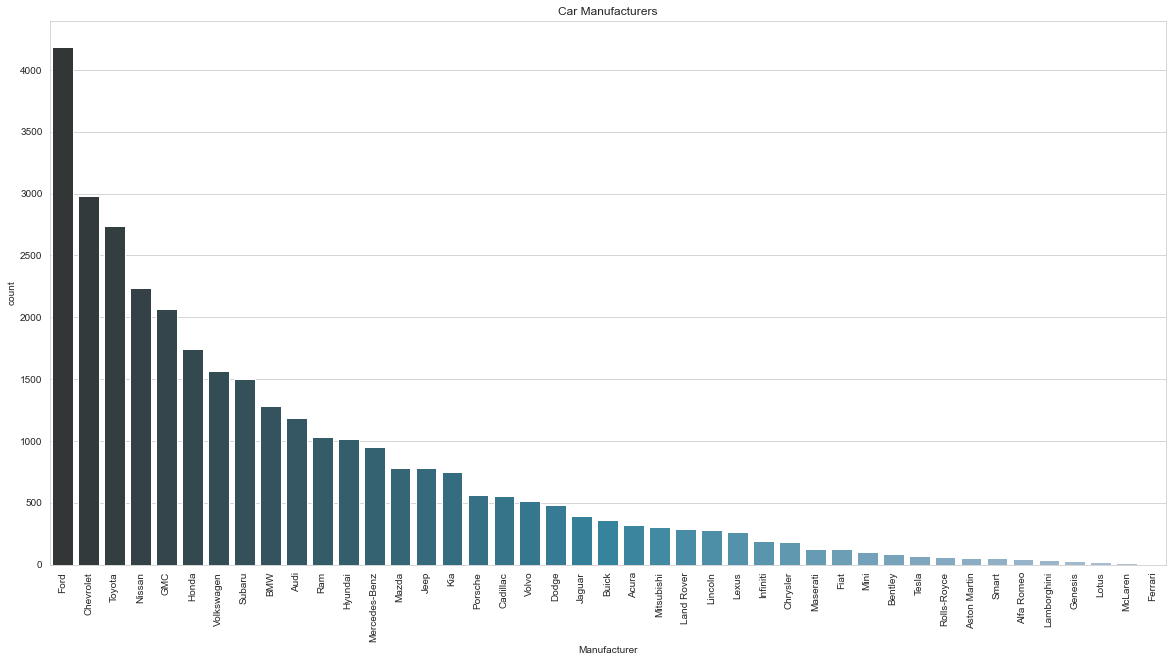

In [9]:
# Count of cars for particular car manufacturer. 

sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
fig = sns.countplot(
    data=df1,
    x='Manufacturer',
    order = df1['Manufacturer'].value_counts().index,
    palette='PuBuGn_d'
)
fig.set_title('Car Manufacturers')
plt.xticks(rotation=90)

### 2. Price

In [10]:
# removing $ sign from the price 

df1['MSRP'] = df1['MSRP'].str.replace("$", "").str.replace(",", "").astype(float)

Text(0, 0.5, 'PDF')

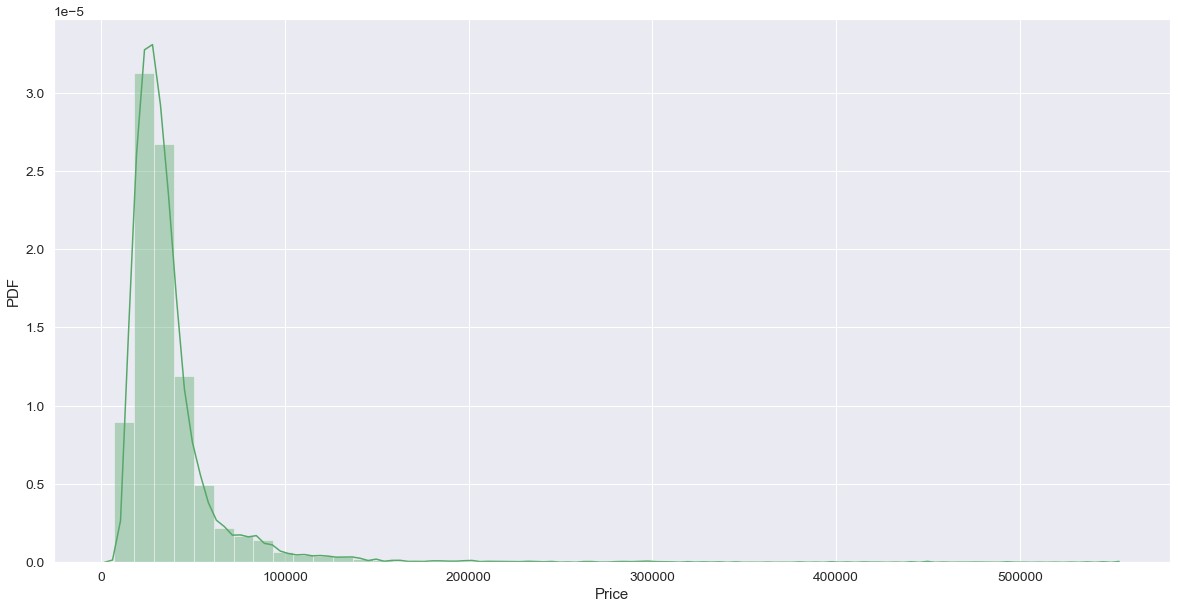

In [11]:
plt.figure(figsize=[20,10])
sns.set(font_scale=1.25)
sns.distplot(df1['MSRP'].dropna(),color='g')
plt.xlabel('Price')
plt.ylabel('PDF')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text major ticklabel objects>)

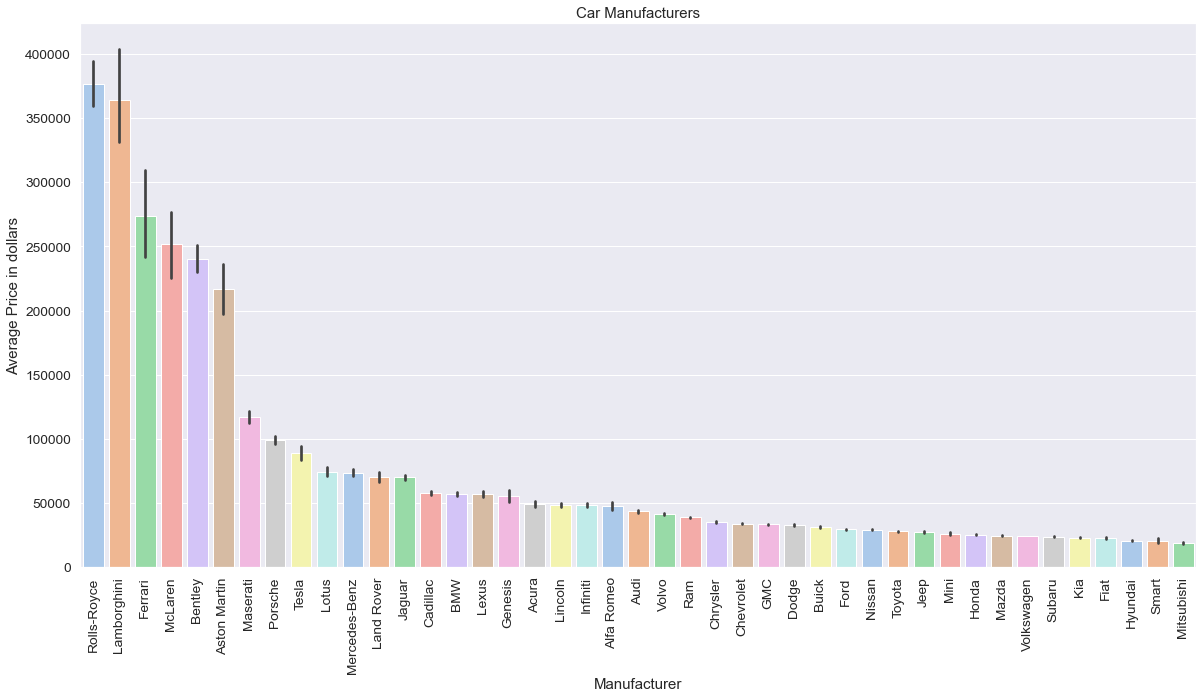

In [12]:
# avg price in dollors with resepct to each car manufacturer

sns.set(font_scale=1.25)
plt.figure(figsize=(20,10))
fig = sns.barplot(
    data=df1,
    x='Manufacturer',
    y='MSRP',
    order = df1.groupby(by = 'Manufacturer')['MSRP'].mean().sort_values(ascending=False).index ,
    palette='pastel'
)
fig.set(ylabel = 'Average Price in dollars')
fig.set_title('Car Manufacturers')
plt.xticks(rotation=90)

### 3. Engine 

In [13]:
# fetch the engine segment name :

df1['Engine'] = df1['Engine'].str.split(',').str[0].str.split(' ').str[-1]

In [14]:
df1['Engine'].head()

0    I-4
1    I-4
2    I-4
3    I-4
4    I-4
Name: Engine, dtype: object

In [15]:
# let's replace some engine segment name for better understanding :

df1['Engine'].replace({'I-4':'l4','V-6':'V6','I4':'l4',
                       
                       'V-12':'V12','V-8':'V8','I-5':'l5',
                       
                       'I5':'l5','W-12':'W12','I-6':'l6',
                       
                       '6-Cyl':'Flat','Cyl':'Flat','I-3':'l3',
                       
                       'L4':'l4','Turbocharged':'l4','Gas':'l4',
                       
                       '4-Cyl':'l4','5-Cyl':'l5','ECOTEC':'l4',
                       
                       'Diesel':'l4','(Vortec)':'V8','I3':'l3',
                       
                       'V-10':'V10','i4':'l4','4-cyl':'l4',
                       
                       'H-6':'Flat','6':'Flat','6-cyl':'Flat',
                       
                       'H-4':'Flat','4':'Flat','Electric/Gas':'Electric'}, inplace = True)

In [16]:
df1['Engine'].head()

0    l4
1    l4
2    l4
3    l4
4    l4
Name: Engine, dtype: object

Text(0.5, 1.0, 'Engine Configuration')

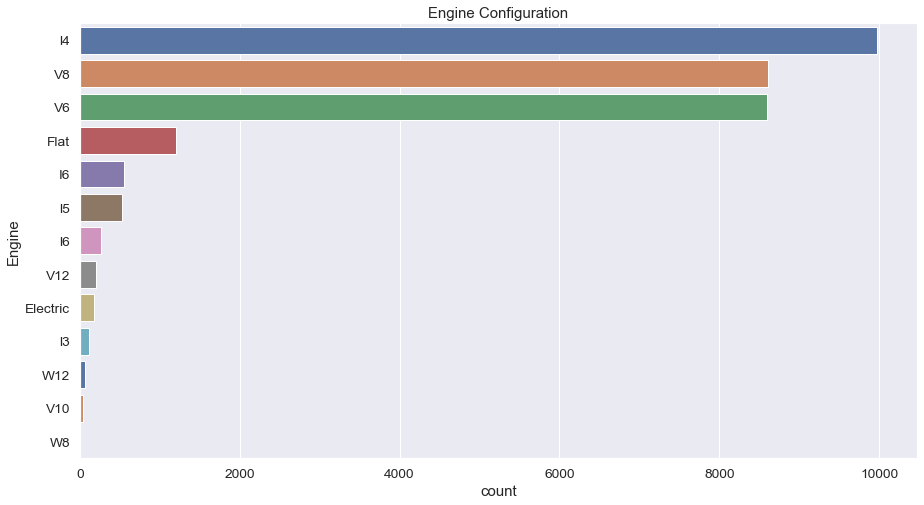

In [17]:
plt.figure(figsize=(15,8))
fig = sns.countplot(
    data=df1,
    y='Engine',
    order = df1['Engine'].value_counts().index,
    palette='deep'
)
fig.set_title('Engine Configuration')

Text(0.5, 1.0, 'Car Manufacturers')

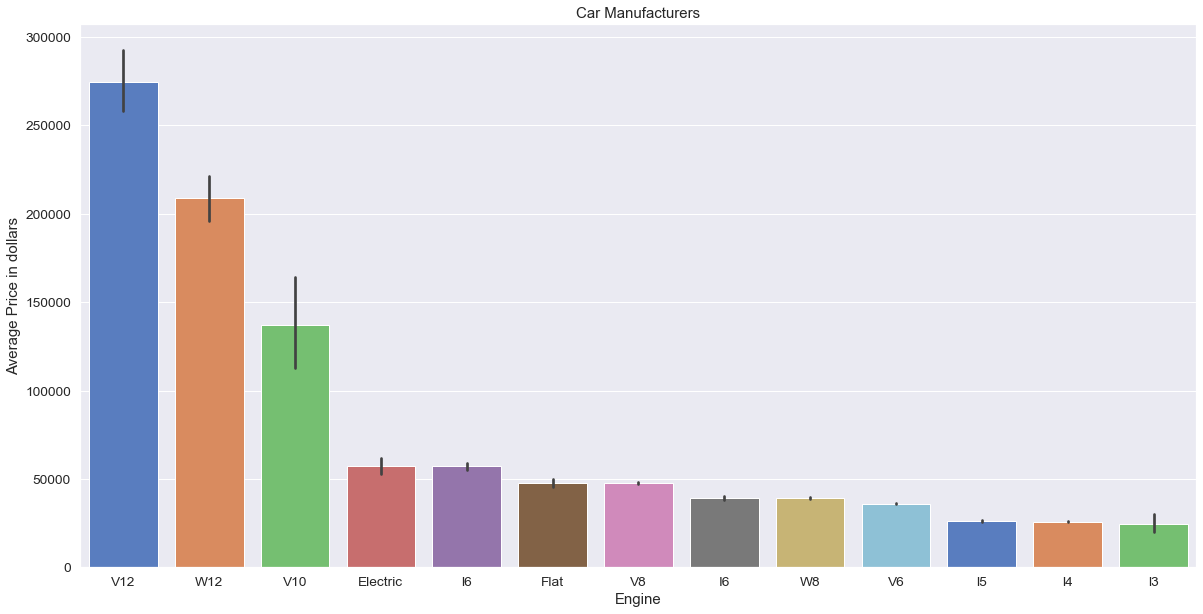

In [18]:
# plot the avg price of engine in cars :

plt.figure(figsize=(20,10))
fig = sns.barplot(
    data=df1,
    x='Engine',
    y='MSRP',
    order = df1.groupby(by = 'Engine')['MSRP'].mean().sort_values( ascending=False).index ,
    palette='muted'
)
fig.set(ylabel = 'Average Price in dollars')
fig.set_title('Car Manufacturers')

Text(0.5, 1.0, 'Boxplot between Engine type and price')

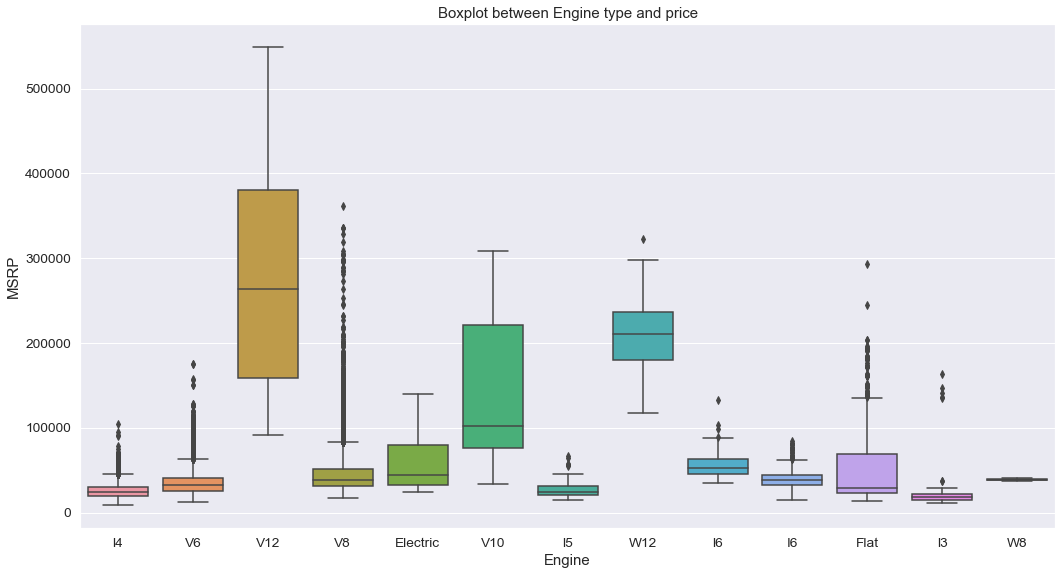

In [19]:
# Boxplot between Engine type and price

plt.figure(figsize=[15,8])
sns.boxplot(x='Engine' , y='MSRP',data=df1)
plt.tight_layout()
plt.title('Boxplot between Engine type and price')

### 4. Suspension :

In [20]:
df1['Suspension Type - Front'].value_counts()

Strut                               5347
Independent                         4971
MacPherson Strut                    4418
Double Wishbone                     3673
Torsion Bar                         1450
Coil Spring                         1155
MacPherson strut                     900
Independent Strut                    775
Multi-Link                           745
Short And Long Arm                   737
Double-Wishbone                      598
Coil                                 457
Coil springs                         286
Short/Long Arm                       259
Independent SLA                      238
Coil Springs                         217
Four-Link                            185
Double wishbone                      174
4-Link                               158
Other                                138
Indep Torsion Bar                    125
MacPherson                           123
Double Pivot                         122
Double-wishbone                      114
Leading Link    

In [21]:
# suspension type - front :

df1['Suspension Type - Front'] = df['Suspension Type - Front']

In [22]:
# let's divide the suspension type into the different pattern :

pattern1 = re.compile(r'(?i)(strut|MacPh|Mcpher)')                          #Strut

pattern2 = re.compile(r'(?i)(bone|short|sla|pivot|upper)')                  #Wishbone

pattern3 = re.compile(r'(?i)(tors|twis|crank|torq)')                        #Torsion bar

pattern4 = re.compile(r'(?i)(coil)')                                        #Coil spring

pattern5 = re.compile(r'(?i)(link|trap|control arm|multi|Trailing arm)')    #Link type

pattern6 = re.compile(r'(?i)(crank|solid|axle)')                            #Axle

pattern7 = re.compile(r'(?i)(leaf|stage|hotch|hypo)')                       #Leaf type

pattern8 = re.compile(r'(?i)(air)')                                         #Air suspension

pattern9 = re.compile(r'(?i)(indep|indpen|indep)')                          #Independent

In [23]:
df1['Suspension Type - Front'].fillna('NA',inplace = True)
df1['Suspension Type - Rear'].fillna('NA',inplace = True)

def suspension(x):
    if re.search(pattern1,x):
        return 'MacPherson Strut'
    elif re.search(pattern2,x):
        return 'Double Wishbone'
    elif re.search(pattern3,x):
        return 'Torsion Bar'
    elif re.search(pattern4,x):
        return 'Coil Spring'
    elif re.search(pattern5,x):
        return 'Link type'
    elif re.search(pattern6,x):
        return 'Axle'
    elif re.search(pattern7,x):
        return 'Leaf type'
    elif re.search(pattern8,x):
        return 'Air Suspension'
    elif re.search(pattern9,x):
        return 'Independent'
    else:
        return 'Others'

In [24]:
df1['Suspension Type - Front'] = df1['Suspension Type - Front'].apply(suspension)

df1['Suspension Type - Front'].value_counts()

MacPherson Strut    12220
Double Wishbone      6358
Independent          5051
Coil Spring          2463
Others               2440
Link type            1778
Torsion Bar          1662
Axle                  183
Leaf type             113
Air Suspension         48
Name: Suspension Type - Front, dtype: int64

In [25]:
# apply the same pattern for rear type suspension :

df1['Suspension Type - Rear'] = df1['Suspension Type - Rear'].apply(suspension)

df1['Suspension Type - Rear'].value_counts()

Link type           17788
Leaf type            3020
Others               2595
Independent          2535
Double Wishbone      2490
Torsion Bar          1853
Coil Spring           718
MacPherson Strut      678
Axle                  577
Air Suspension         62
Name: Suspension Type - Rear, dtype: int64

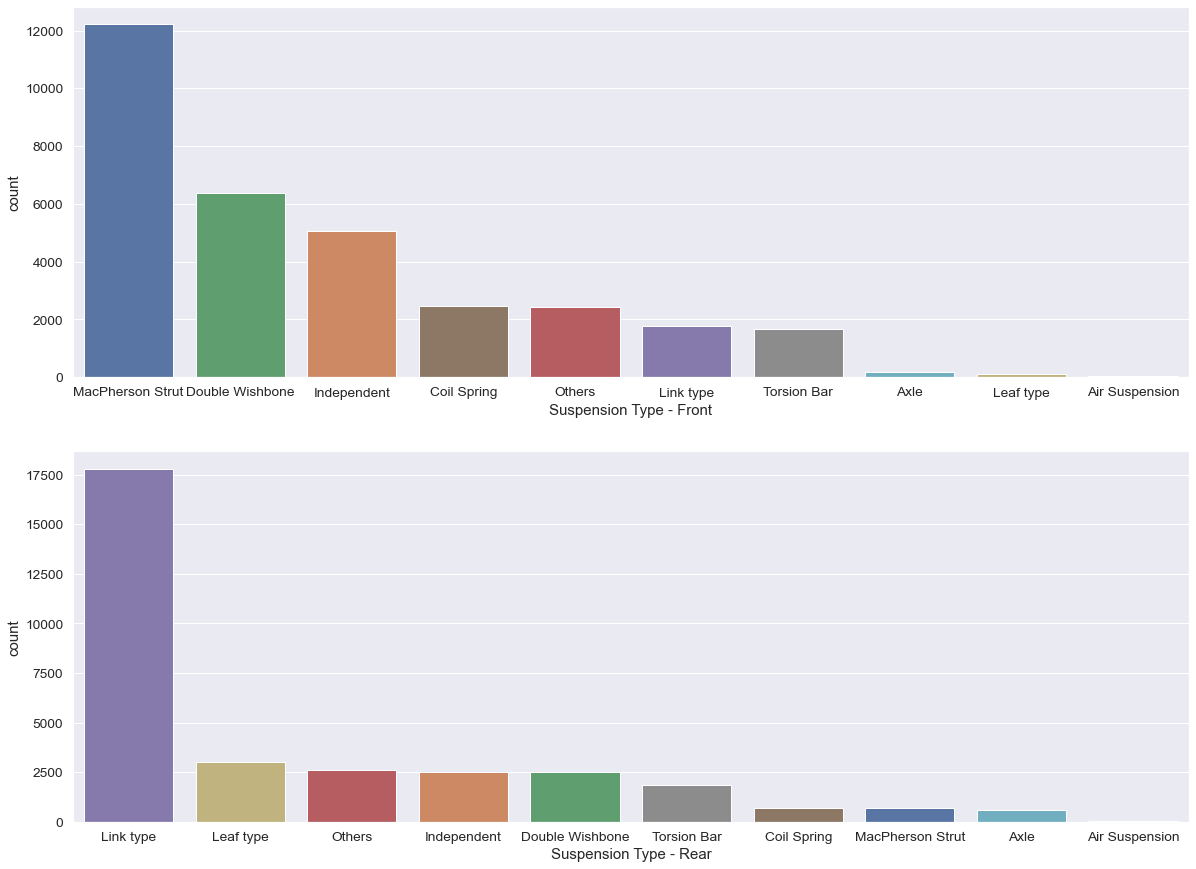

In [26]:
# Let's plot the count of front and rear suspension type distribution :

p = dict(zip(df1['Suspension Type - Front'].unique(), 
             sns.color_palette()))
fig, ax =plt.subplots(2,1,figsize=(20,15))

sns.countplot(df1['Suspension Type - Front'],palette=p,order=df1['Suspension Type - Front'].value_counts().index ,ax=ax[0])
sns.countplot(df1['Suspension Type - Rear'],palette=p ,order=df1['Suspension Type - Rear'].value_counts().index ,ax=ax[1])

### 5. Fuel Economy :

In [27]:
# convert fuel economy datatype as object to float :

df1['EPA Fuel Economy Est - City (MPG)'] = df1['EPA Fuel Economy Est - City (MPG)'].str.split(' ').str[0].astype('float')

In [28]:
df1['EPA Fuel Economy Est - City (MPG)'].head()

0    22.0
1    22.0
2    22.0
3    22.0
4    21.0
Name: EPA Fuel Economy Est - City (MPG), dtype: float64

### 6. Curb Weight :

In [29]:
# convert Base curb weight lbs to float :

df1['Base Curb Weight (lbs)'] = df1['Base Curb Weight (lbs)'].str.replace(',','').str.split(' ').str[0].str.split('-').str[0].astype('float')

In [30]:
df1['Base Curb Weight (lbs)'].head()

0    3790.0
1    3829.0
2    3821.0
3    3783.0
4    4026.0
Name: Base Curb Weight (lbs), dtype: float64

### 7. Passenger Volume :

In [31]:
df1['Passenger Volume (ft³)'] = df1['Passenger Volume (ft³)'].replace('-TBD-',np.NAN).astype('float')

In [32]:
df1['Passenger Volume (ft³)'].head()

0    104.0
1    104.0
2    104.0
3    104.0
4    104.0
Name: Passenger Volume (ft³), dtype: float64

### 8. Overall height :

In [33]:
df1['Height, Overall (in)'] = df1['Height, Overall (in)'].str.split(' ').str[0].astype('float')

In [34]:
df1['Height, Overall (in)'].head()

0    65.7
1    65.7
2    65.7
3    65.7
4    65.7
Name: Height, Overall (in), dtype: float64

### 9. Fuel Capacity :

In [35]:
df1['Fuel Tank Capacity, Approx (gal)'] = df1['Fuel Tank Capacity, Approx (gal)'].str.split(' ').str[0].astype('float')

In [36]:
df1['Fuel Tank Capacity, Approx (gal)'].head()

0    17.1
1    17.1
2    17.1
3    17.1
4    17.1
Name: Fuel Tank Capacity, Approx (gal), dtype: float64

### 10. Body Style :

In [37]:
df1['Body Style'].unique()

array(['Sport Utility', '4dr Car', '2dr Car', 'Convertible', nan,
       'Station Wagon', 'Crew Cab Pickup - Short Bed',
       'Regular Cab Pickup - Long Bed',
       'Extended Cab Pickup - Standard Bed',
       'Crew Cab Pickup - Standard Bed',
       'Regular Cab Pickup - Standard Bed',
       'Extended Cab Pickup - Long Bed',
       'Extended Cab Pickup - Short Bed',
       'Regular Cab Pickup - Short Bed', 'Regular Cab Chassis-Cab',
       'Crew Cab Pickup - Long Bed', 'Full-size Passenger Van',
       'Mini-van, Cargo', 'Mini-van, Passenger', 'Extended Cab Pickup',
       'Full-size Cargo Van', 'Specialty Vehicle', '3dr Car', 'Hatchback',
       'Crew Cab Pickup'], dtype=object)

In [38]:
# string.replace(old, new, count)

df1['Body Style'].replace('Crew Cab Pickup', 'Crew Cab Pickup - Standard Bed' , inplace = True)

df1['Body Style'].replace('Extended Cab Pickup', 'Extended Cab Pickup - Standard Bed' , inplace = True)

df1['Body Style'].replace('Regular Cab Chassis-Cab', 'Regular Cab Pickup - Standard Bed',inplace = True)

df1['Body Style'].replace('3dr Car' , 'Hatchback' , inplace = True)

df1['Body Style'].replace(['Crew Cab Pickup','Extended Cab Pickup'] , np.nan , inplace = True)

In [39]:
df1['Body Style'].unique()

array(['Sport Utility', '4dr Car', '2dr Car', 'Convertible', nan,
       'Station Wagon', 'Crew Cab Pickup - Short Bed',
       'Regular Cab Pickup - Long Bed',
       'Extended Cab Pickup - Standard Bed',
       'Crew Cab Pickup - Standard Bed',
       'Regular Cab Pickup - Standard Bed',
       'Extended Cab Pickup - Long Bed',
       'Extended Cab Pickup - Short Bed',
       'Regular Cab Pickup - Short Bed', 'Crew Cab Pickup - Long Bed',
       'Full-size Passenger Van', 'Mini-van, Cargo',
       'Mini-van, Passenger', 'Full-size Cargo Van', 'Specialty Vehicle',
       'Hatchback'], dtype=object)

In [40]:
df1['Category'] = df1['Body Style']

In [41]:
van = ['Mini-van, Cargo', 'Full-size Passenger Van', 
       'Full-size Cargo Van', 'Mini-van, Passenger', 
       'Specialty Vehicle']

In [42]:
pickups = ['Crew Cab Pickup - Short Bed', 'Crew Cab Pickup - Standard Bed', 
        'Extended Cab Pickup - Short Bed', 'Extended Cab Pickup - Standard Bed',
        'Extended Cab Pickup - Long Bed', 'Regular Cab Pickup - Long Bed', 
        'Crew Cab Pickup - Long Bed', 'Regular Cab Pickup - Short Bed', 
        'Regular Cab Pickup - Standard Bed', 'Extended Cab Pickup', 'Crew Cab Pickup',
        'Regular Cab Chassis-Cab', 'Pickup - Short Bed', 'Pickup - Standard Bed', 'Pickup - Long Bed']

In [43]:
car = ['2dr Car', '4dr Car', 
       'Convertible', 'Station Wagon', 
       '3dr Car', 'Hatchback']

In [44]:
df1['Category'] = df1['Category'].str.replace('Sport Utility', 'SUV')

In [45]:
for item in van:
    df1['Category'] = df1['Category'].str.replace(item, 'Van')
    
for item in pickups:
    df1['Category'] = df1['Category'].str.replace(item, 'Pickup')
    
for item in car:
    df1['Category'] = df1['Category'].str.replace(item, 'Car')

In [46]:
df1['Category'].unique()

array(['SUV', 'Car', nan, 'Pickup', 'Van'], dtype=object)

### 11. Drivetrain :

In [47]:
# replace front wheel drive with FWD :

df1['Drivetrain'].replace(['Front Wheel Drive', 'Front-Wheel Drive' , 
                           'Front wheel drive','Front-wheel drive' ,
                           '2 Wheel Drive' , '2WD' , '2-Wheel Drive'] , 'FWD' , inplace = True)

In [48]:
# replace rear wheel drive with RWD :

df1['Drivetrain'].replace(['Rear Wheel Drive' , 'REAR WHEEL DRIVE' , 
                           'Rear-Wheel Drive' ,'Rear wheel drive'] , 'RWD' , inplace = True)

In [49]:
# replace all wheel drive with AWD :

df1['Drivetrain'].replace(['All Wheel Drive' , 'All-Wheel Drive' ,
                           'All wheel drive' , 'All-wheel drive' ] , 'AWD' , inplace = True)

In [50]:
# replace 4 wheel drive with 4WD :

df1['Drivetrain'].replace(['4 Wheel Drive' , 'Four Wheel Drive' , 
                           '4-Wheel Drive' , 'Four-Wheel Drive' , 
                           '4-wheel Drive' , 'Four wheel drive'] , '4WD' , inplace = True)

In [51]:
df1['Drivetrain'].unique()

array(['FWD', 'AWD', '4WD', 'RWD', nan], dtype=object)

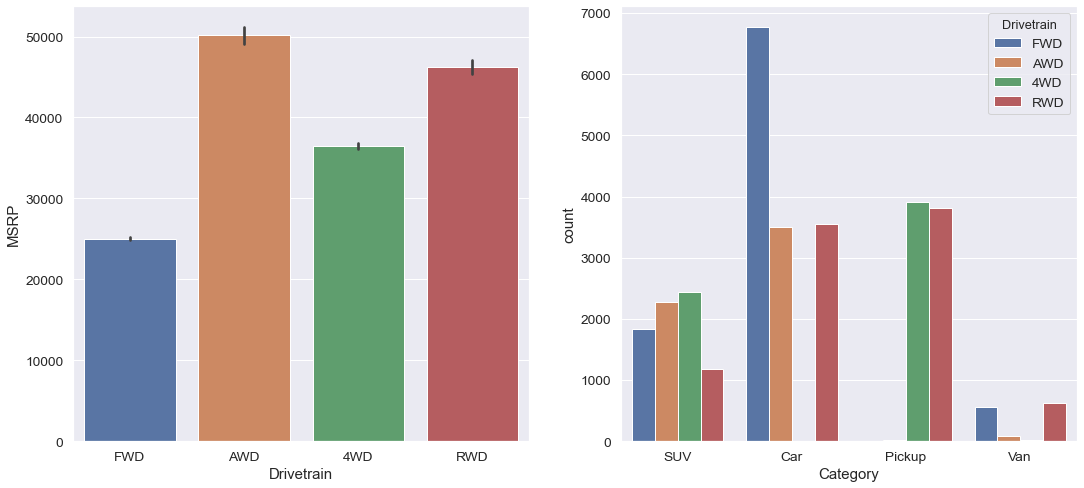

In [52]:
fig, ax =plt.subplots(1,2,figsize=(18,8))
sns.barplot(df1['Drivetrain'] , df1['MSRP'] , ax=ax[0])
sns.countplot(df1['Category'] , hue=df1['Drivetrain'] , ax=ax[1])

- Boxplot between Price and Drivetrain types :

Text(0.5, 1.06, 'Boxplot between Price and Drivetrain types')

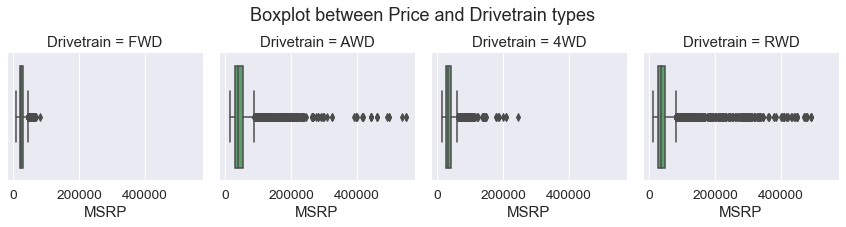

In [53]:
g = sns.FacetGrid(df1 , col='Drivetrain')
g.map(sns.boxplot , 'MSRP',color='g')
g.fig.suptitle('Boxplot between Price and Drivetrain types',y=1.06)

### 12. Number of gears :

In [54]:
df1['Trans Type'].unique()

array(['10', '6', '5', '9', '7', '8', '1', '4', nan, 'Tiptronic', '4.0',
       '6.0', '5.0', '9.0', '7.0', '8.0', '1.0', '10.0', '4-Speed',
       'HD 5', '5-Speed', '2', 'CVT', '6-speed', '3', '5-speed'],
      dtype=object)

In [55]:
df1['Trans Type'].replace('10.0' , '10' , inplace = True)

df1['Trans Type'].replace('9.0' , '9' , inplace = True)

df1['Trans Type'].replace('8.0', '8' , inplace = True)

df1['Trans Type'].replace('7.0', '7' , inplace = True)

df1['Trans Type'].replace(['6.0' ,6.0, '6-speed' , 'Tiptronic'] , '6' , inplace = True)

df1['Trans Type'].replace(['5.0',5.0 , '5-speed','5-Speed' , 'HD 5'] , '5' , inplace = True)

df1['Trans Type'].replace(['4-Speed','4.0',4.0] , '4' , inplace = True)

df1['Trans Type'].replace(['4-Speed'] , '4' , inplace = True)

df1['Trans Type'].replace(['1.0','2'],'<3',inplace = True)

df1['Trans Type'].replace('3','<3',inplace = True)

df1['Trans Type'].replace([1,'1'],'<3',inplace = True)

In [56]:
# let's check the changes :

df1['Trans Type'].unique()

array(['10', '6', '5', '9', '7', '8', '<3', '4', nan, 'CVT'], dtype=object)

In [57]:
df1['Trans Type'].value_counts()

6      11449
5       7459
4       4663
8       3015
<3      1668
7       1379
9        487
10       193
CVT       22
Name: Trans Type, dtype: int64

### 13. Fuel System :

In [58]:
df1['Fuel System'].unique()

array(['Gasoline Direct Injection', 'Sequential MPI',
       'Electronic Fuel Injection', 'Direct Injection', 'DI', 'PGM-FI',
       'PGM-FI MPI', 'Port/Direct Injection', nan, 'MPFI', 'MPI', 'SEFI',
       'Diesel Direct Injection', 'FSI', 'Direct injection', 'Direct',
       'TDI', 'SDI', 'FSI Direct', 'TFSI Direct', 'DOHC FSI Direct',
       'TFSI', 'SI', 'SMPI', 'SFI', 'EFI', 'GDI', 'HPI', 'FI',
       'Sequential MPI (injection)', 'Electronic fuel injection', 'SIDI',
       'Direct Gasoline Injection', 'PFI', 'MFI',
       'Sequential Fuel Injection', 'Electric', 'SFI FlexFuel', 'SPFI',
       'SMFI', 'SPI', 'Turbo-Charged DI', 'Turbo-Charged OHV', 'Hydrogen',
       'Supercharged SPFI', 'Supercharged EFI', 'DIS', 'SFI/DI', 'SMPFI',
       'DISI', 'EMPI', 'Electronic Fuel Injectino', 'CRD', 'CDI',
       'Turbocharged EMFI', 'Turbocharged EFI', 'FFV', 'NDIS',
       'Turbocharged DI', 'Turbocharged SMPI', 'Turbocharged',
       'Turbocharged FSI', 'Turbo-Diesel'], dtype=object)

In [59]:
# DI - Direct Injection 

df1['Fuel System'].replace(['Gasoline Direct Injection' , 'Direct Injection' , 'Port/Direct Injection' , 
                            'Diesel Direct Injection' ,'NDIS', 'DI' , 'Direct Gasoline Injection' ,'MPFI' , 
                            'Turbocharged DI','FSI','SIDI','SMFI','Turbocharged SMPI','TDI', 
                            'TFSI Direct','Turbocharged','Direct injection','TFSI','GDI','SDI','Turbo-Diesel',
                            'Turbo-Charged OHV','FSI Direct','DOHC FSI Direct','Direct','DISI','SFI/DI'
                            'Turbocharged FSI','Turbo-Charged DI','CDI','Turbocharged FSI','FI','SFI/DI'
                            'NDIS','CRD','DIS','SFI/DI','SFI/DI','PFI','HPI'] , 'DI' , inplace = True)

In [60]:
# SFI - Sequential fuel injection 

df1['Fuel System'].replace(['Sequential MPI','SMPI','SEFI','MPI','MFI','SFI FlexFuel','Sequential MPI (injection)'
                            'Sequential Fuel Injection','SPI','SI','Sequential Fuel Injection',
                            'Supercharged SPFI','SMPFI','Sequential MPI (injection)'] , 'SFI' , inplace = True)

In [61]:
# EFI -  Electronic Fuel Injection

df1['Fuel System'].replace(['Electronic Fuel Injection','PGM-FI','Electronic fuel injection' , 
                            'Turbocharged EFI','EMPI','PGM-FI MPI','Supercharged EFI','FFV',
                            'Electronic Fuel Injectino','Electric','Hydrogen','Turbocharged EMFI','EFI',
                            'FFV','SPFI'] , 'Electric FI' , inplace = True)

In [62]:
df1['Fuel System'].value_counts()

SFI            12564
DI             10644
Electric FI     6278
Name: Fuel System, dtype: int64

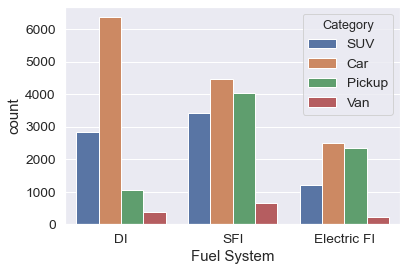

In [63]:
sns.countplot(df1['Fuel System'],hue=df1['Category'])

Text(0.5, 1.0, 'Car Manufacturers')

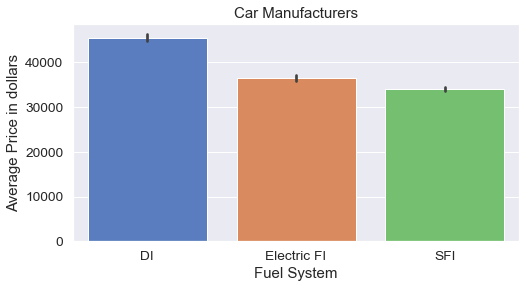

In [64]:
plt.figure(figsize=(8,4))
g = sns.barplot(
    data=df1,
    x='Fuel System',
    y='MSRP',
    order = df1.groupby(by = 'Fuel System')['MSRP'].mean().sort_values( ascending=False).index ,
    palette='muted'
)
g.set(ylabel = 'Average Price in dollars')
g.set_title('Car Manufacturers')

### 14. Type of transmission :

In [65]:
df1['Trans Description Cont.'].unique()

array(['Automatic w/OD', 'Automatic w/Manual Shift', 'Automatic',
       'Auto-Shift Manual w/OD', 'Automatic w/OD,', 'Manual w/OD',
       'CVT w/OD', 'Continuously Variable Ratio', 'Manual', nan,
       'Sportshift Automatic', 'Automatic w/manual shift',
       'Automatic CVT', 'CVT Automatic w/OD', 'Manual w/OD,',
       'Automatic w/Manual Transmission', 'CVT', 'Tiptronic',
       'Automatic,', 'CVT Automatic', 'S tronic Automatic w/OD',
       'DSG Automatic w/OD', 'Direct Shift Automatic',
       'Sequential Manual', 'SMG', 'HD Automatic w/OD', 'manual w/OD',
       'automatic w/OD', 'HD Automatic w/OD,', 'HD Automatic', 'HD',
       'Continuously Variable Transmission', 'Multi-Speed Automatic w/OD',
       'Continuously variable ratio', 'HD Manual w/OD', 'HD Manual w/OD,',
       'Auto w/OD', 'HD Auto w/OD', 'Electronic', 'HD Electronic',
       'Automatic w/SHIFTRONIC, OD', ' Automatic w/OD',
       'Automatic w/CommandShift', 'Automatic/CVT w/OD', 'ECVT',
       'Electronic au

In [66]:
pattern1 = re.compile(r'(?i)(auto|hd auto|elec)')                                   #Automatic                   
pattern2 = re.compile(r'(?i)(man|hd man)')                                          #Manual               
pattern3 = re.compile(r'(?i)(cont|cvt|ECVT)')                                       #CVT
pattern4 = re.compile(r'(?i)(Automatic w/OD|Automatic|Auto w/OD|elec|tip|smg)')     #Automatic
pattern5 = re.compile(r'(?i)(Man|dsg|hd)')                                          #Manual

In [67]:
df1['Trans Description Cont.'].fillna('NA',inplace = True)

In [68]:
def transmission(x):
    if re.match(pattern2,x) or re.search(pattern5,x):
        return 'Manual'
    elif re.match(pattern1,x) or re.search(pattern4,x):
        return 'Automatic'
    elif re.match(pattern3,x):
        return 'CVT'
    else:
        return x

In [69]:
df1['Trans Description Cont.'] = df1['Trans Description Cont.'].apply(transmission)
df1['Trans Description Cont.'].value_counts()

Automatic    19086
Manual        9597
NA            2037
CVT           1596
Name: Trans Description Cont., dtype: int64

Text(0.5, 1.0, 'Car Manufacturers')

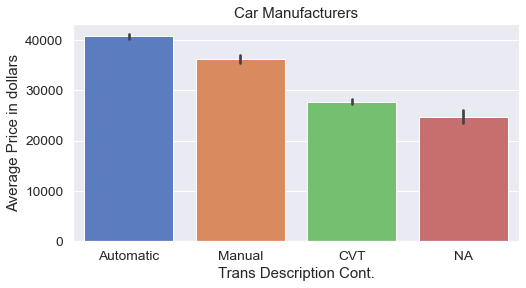

In [70]:
plt.figure(figsize=(8,4))
g = sns.barplot(
    data=df1,
    x='Trans Description Cont.',
    y='MSRP',
    order = df1.groupby(by = 'Trans Description Cont.')['MSRP'].mean().sort_values( ascending=False).index ,
    palette='muted'
)
g.set(ylabel = 'Average Price in dollars')
g.set_title('Car Manufacturers')

### 15. HorsePower :

In [71]:
#df1['SAE Net Horsepower @ RPM'].unique()

In [72]:
df1['SAE Net Horsepower @ RPM'] = pd.to_numeric(df1['SAE Net Horsepower @ RPM'].str.split('@').str[0].str.split(' ').str[0],errors='coerce')

Text(0, 0.5, 'PDF')

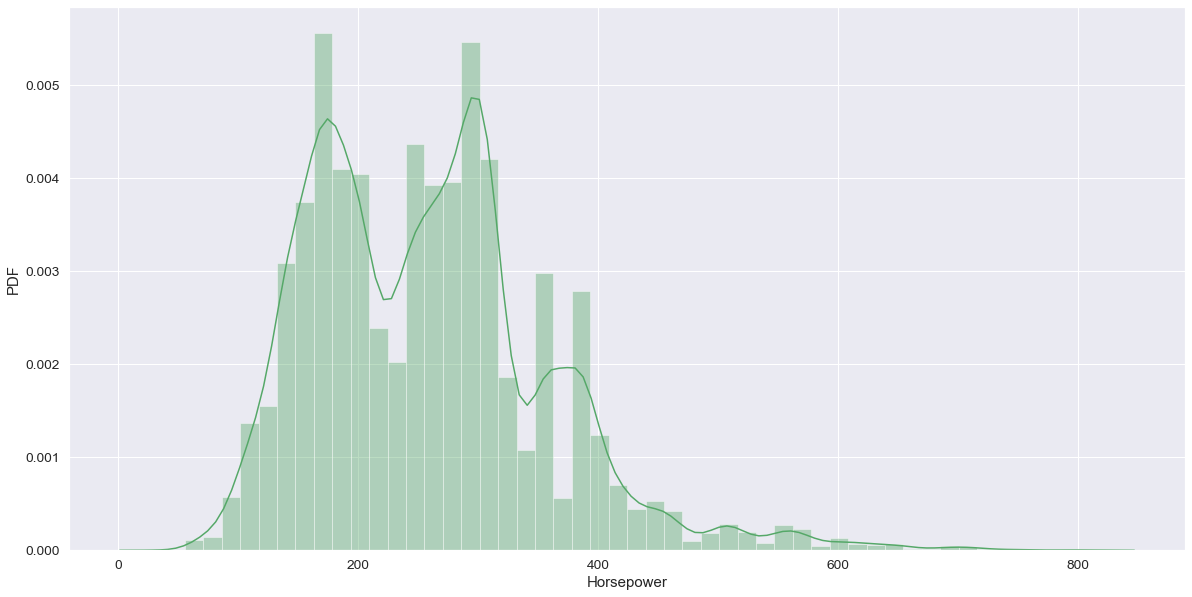

In [73]:
plt.figure(figsize=[20,10])
sns.set(font_scale=1.25)
sns.distplot(df1['SAE Net Horsepower @ RPM'].dropna(),color='g')
plt.xlabel('Horsepower')
plt.ylabel('PDF')

##### Comparision between Horsepower and Price :

Text(0.5, 1.05, 'Comparision between Horsepower and Price')

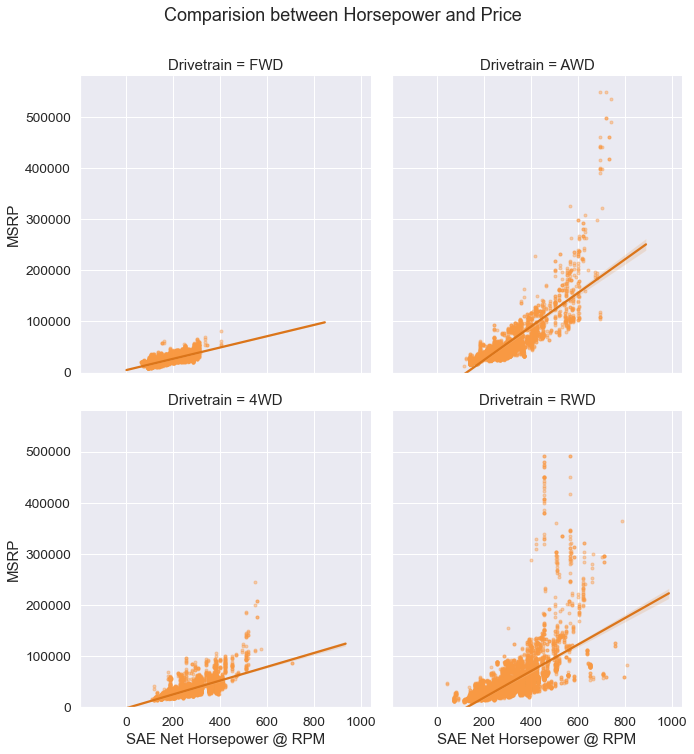

In [74]:
lm = sns.lmplot(x = 'SAE Net Horsepower @ RPM' , 
           y = 'MSRP' ,
           markers= '.',
           col = 'Drivetrain',
           col_wrap=2,
           palette='Blues',
           scatter_kws={'alpha':0.4, 'color':'#fa9943'},
           line_kws={'color': '#db751a'},
           data=df1)
lm.set(ylim=(0, None))
lm.fig.suptitle('Comparision between Horsepower and Price',y=1.05)

### 16. Torque :

In [75]:
#Net Torque

df1['SAE Net Torque @ RPM'] = pd.to_numeric(df1['SAE Net Torque @ RPM'].str.split('@').str[0].str.split(' ').str[0], errors='coerce')

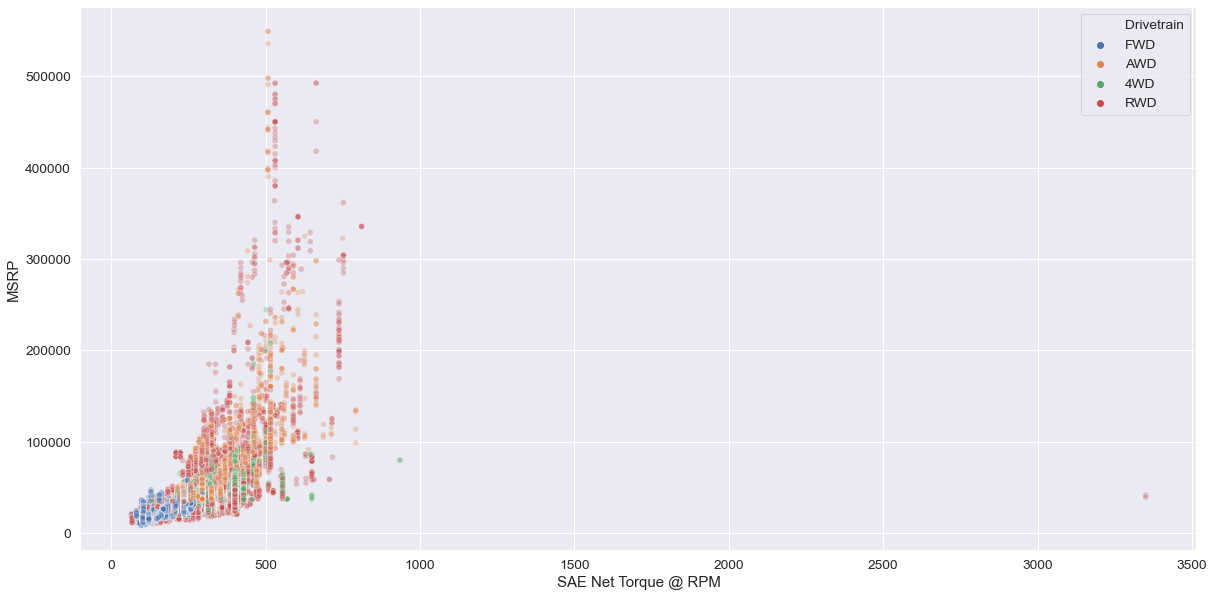

In [76]:
plt.figure(figsize=(20,10))
sns.scatterplot(df1['SAE Net Torque @ RPM'] , df1['MSRP'],hue = df1['Drivetrain'] , alpha = 0.3)

In [77]:
#Torque value above 1000 Nm is highly unlikely

df[df1['SAE Net Torque @ RPM'] > 1000][['Model','Engine','SAE Net Torque @ RPM']]

,Model,Engine,SAE Net Torque @ RPM
5725,2009 Chevrolet Tahoe Specs: 2WD 4-Door 1500 LT...,"Gas/Ethanol V8, 5.3L",3350 @ 4400
5726,2009 Chevrolet Tahoe Specs: 2WD 4-Door 1500 LT...,"Gas/Ethanol V8, 5.3L",3350 @ 4400


In [78]:
#Torque produced by Chevrolet Tahoe is around 460 Nm

df1['SAE Net Torque @ RPM'].replace(3350,460,inplace=True)

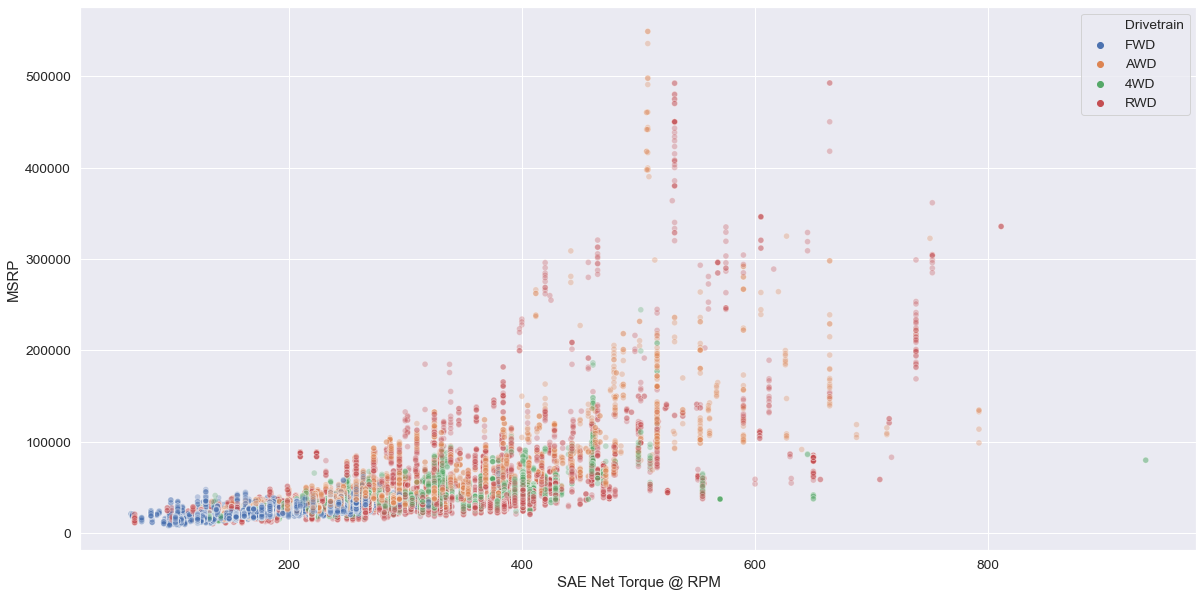

In [79]:
plt.figure(figsize=(20,10))
sns.scatterplot(df1['SAE Net Torque @ RPM'] , df1['MSRP'],hue = df1['Drivetrain'] , alpha = 0.3)

### 17. Displacement :

In [80]:
df1['Displacement'] = pd.to_numeric(df1['Displacement'].str.strip(' ').str.split('L').str[0].str.split('/').str[0].str.split(' ').str[0]
                      ,errors='coerce')

In [81]:
df1['Displacement'].unique()

array([ 2.  ,  3.5 ,  2.3 ,  3.  ,  3.7 ,  2.4 ,  1.5 ,  3.2 ,   nan,
        1.7 ,  2.9 ,  5.2 ,  4.  ,  4.7 ,  4.3 ,  6.  ,  5.9 ,  4.2 ,
        3.1 ,  2.7 ,  2.8 ,  3.6 ,  1.8 ,  2.5 ,  1.4 ,  6.3 ,  6.75,
        6.8 ,  1.9 ,  4.4 ,  4.8 ,  4.6 ,  5.  , 39.5 ,  6.6 ,  5.4 ,
        3.8 ,  5.3 ,  1.6 ,  6.2 ,  5.7 ,  7.  ,  3.4 ,  2.2 ,  3.9 ,
        1.2 ,  6.4 ,  6.1 ,  3.3 ,  6.5 ,  1.3 ,  4.9 ,  5.8 ,  1.  ,
        6.7 ,  7.5 ,  5.6 ,  4.5 ,  5.5 ,  2.6 ,  2.1 ])

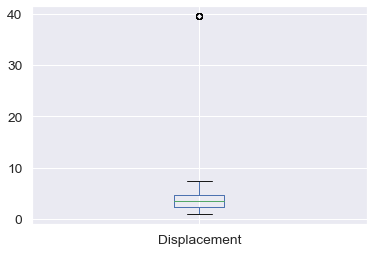

In [82]:
df1['Displacement'].plot(kind='box')

In [83]:
df[df1['Displacement'] > 8][['Engine','Displacement']]

,Engine,Displacement
2641,"Electric/Gas,",39.5 Cu.in. Range Extender
2642,"Electric/Gas,",39.5 Cu.in. Range Extender
2645,"Electric/Gas,",39.5 Cu.in. Range Extender
2646,"Electric/Gas,",39.5 Cu.in. Range Extender
2649,"Electric/Gas,",39.5 Cu.in. Range Extender
2651,"Electric/Gas,",39.5 Cu.in. Range Extender
2653,"Electric/Gas,",39.5 Cu.in. Range Extender


In [84]:
#BMW i3 is a hybrid car which has engine size of 650 cc

df1['Displacement'].replace(39.5,0.65,inplace=True)

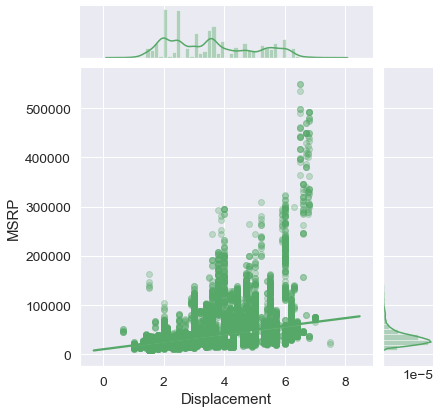

In [85]:
g = sns.jointplot(data=df1 , x = 'Displacement' , y = 'MSRP',kind='reg',color = 'g',
                 joint_kws = {'scatter_kws':dict(alpha=0.3)})

### 18.Turning Diamter :

In [86]:
df1['Turning Diameter - Curb to Curb (ft)'] = pd.to_numeric(df1['Turning Diameter - Curb to Curb (ft)'].str.split(' ').str[0],
                                                            errors='coerce')

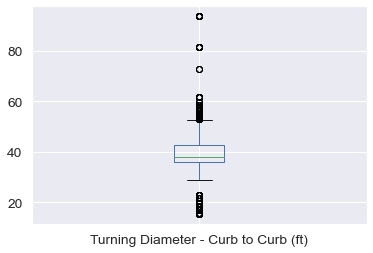

In [87]:
df1['Turning Diameter - Curb to Curb (ft)'].plot(kind='box')

In [88]:
# Outliers

df[(df1['Turning Diameter - Curb to Curb (ft)'] < 20) | (df1['Turning Diameter - Curb to Curb (ft)'] > 80)][['Model' , 'Turning Diameter - Curb to Curb (ft)']]

,Model,Turning Diameter - Curb to Curb (ft)
16428,2000 Hyundai Sonata Specs: 4-Door Sedan Automatic,17.25
16429,2000 Hyundai Sonata Specs: 4-Door Sedan GLS V6...,17.25
16430,2000 Hyundai Sonata Specs: 4-Door Sedan GLS V6...,17.25
16431,2000 Hyundai Sonata Specs: 4-Door Sedan Manual,17.25
16432,1999 Hyundai Sonata Specs: 99A 4-Door Sedan Au...,17.3
16433,1999 Hyundai Sonata Specs: 99B 4-Door Sedan GL...,17.3
16434,1999 Hyundai Sonata Specs: 99B 4-Door Sedan GL...,17.3
16435,1999 Hyundai Sonata Specs: 99B 4-Door Sedan Ma...,17.3
16436,1999 Hyundai Sonata Specs: 99B 4-Door Sedan Au...,17.3
16437,1999 Hyundai Sonata Specs: 99A 4-Door Sedan GL...,17.3


- List of cars in which turning radius is given as turning diameter :

* Hyundai Sonata
* Hyundai Accent
* Kia Niro
* Lexus LS
* Mazda MAZDA3
* Maxda MX-5

- Since Ram ProMaster is a full size van it can have turning diamter above 80 feet

In [89]:
df1['Turning Diameter - Curb to Curb (ft)'] = df1['Turning Diameter - Curb to Curb (ft)'].apply(lambda x: x*2 if x <20 else x)

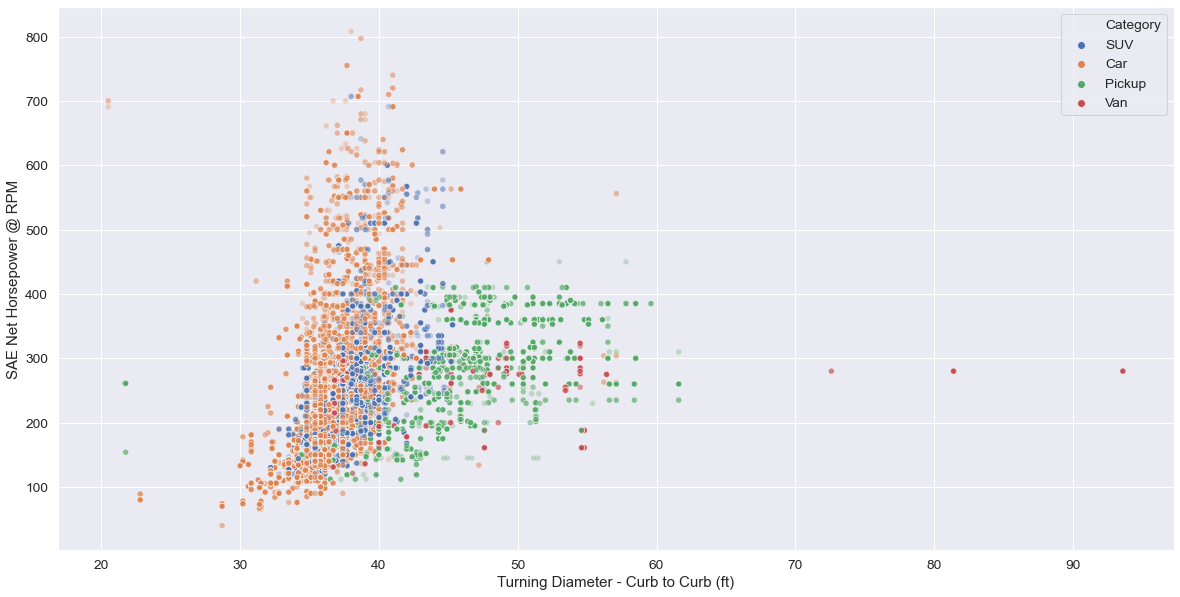

In [90]:
plt.figure(figsize=(20,10))
sns.scatterplot(df1['Turning Diameter - Curb to Curb (ft)'] , 
                df1['SAE Net Horsepower @ RPM'],
                hue = df1['Category'] , alpha = 0.3)

### 19. Wheels :

In [91]:
df1['Front Wheel Material'].replace('Styled Steel','Steel',inplace = True)
df1['Front Wheel Material'].replace('Forged Aluminum','Aluminum',inplace = True)
df1['Front Wheel Material'].replace('Chrome','Alloy',inplace= True)
df1['Front Wheel Material'].value_counts()

Aluminum        19974
Steel            7384
Alloy            2972
Carbon Fibre        3
Name: Front Wheel Material, dtype: int64

In [92]:
df1['Front tire width']=list(map(lambda x: str(x)[1:4],df1['Front Tire Size']))

df1['Front tire aspect ratio']=list(map(lambda x: str(x)[0:2],df1['Front Tire Size'].str.split('/').str[1]))

df1['Front tire speed ratings/cons.type']=list(map(lambda x: str(x)[2:-2],df1['Front Tire Size'].str.split('/').str[1]))

df1['Front tire rim size']=list(map(lambda x: str(x)[-2:],df1['Front Tire Size'].str.split('/').str[1]))

df1=df1.drop('Front Tire Size',axis=1)

In [93]:
df1['Front tire aspect ratio'] = df1['Front tire aspect ratio'].replace(['YR','na',''],np.nan)
df1['Front tire aspect ratio'] = df1['Front tire aspect ratio'].replace('71',70)
df1['Front tire aspect ratio'] = df1['Front tire aspect ratio'].replace('31',30)

In [94]:
#df1['Front tire aspect ratio'].value_counts(dropna = False)

In [95]:
pattern1 = re.compile(r'(?i)(z)')     #Z - 240+ Kmph                  
pattern2 = re.compile(r'(?i)(v)')     #V - 240  Kmph       
pattern3 = re.compile(r'(?i)(h)')     #H - 210  Kmph
pattern4 = re.compile(r'(?i)(t)')     #T - 190  Kmph
pattern5 = re.compile(r'(?i)(r)')     #R - 170  Kmph


def tire_speed(x):
    if re.match(pattern1,x):
        return 'Z'
    elif re.match(pattern2,x):
        return 'V'
    elif re.match(pattern3,x):
        return 'H'
    elif re.match(pattern4,x):
        return 'T'
    elif re.match(pattern5,x):
        return 'R'
    else:
        return 'NA'
    
df1['Front tire speed ratings/cons.type'] = df1['Front tire speed ratings/cons.type'].apply(tire_speed)
df1['Front tire speed ratings/cons.type'].value_counts(dropna = False)

R     16009
NA     6086
H      5235
V      2556
T      1239
Z      1191
Name: Front tire speed ratings/cons.type, dtype: int64

In [96]:
df1['Front tire rim size'].value_counts(dropna = False)

17    7612
18    6453
16    5998
15    3078
20    2188
19    2133
an    2005
6E     617
7E     589
14     470
SL     366
8E     222
22     196
21     159
13      84
7D      28
0E      24
XL      21
AS      15
EL       8
7C       8
95       6
8C       6
0A       6
50       6
45       6
         6
40       5
7R       1
Name: Front tire rim size, dtype: int64

In [97]:
pattern1 = re.compile(r'(1[5-9]|2[0-8])')

def rim_size(x):
    if re.match(pattern1,x):
        return x
    else:
        return np.nan
    
df1['Front tire rim size'] = df1['Front tire rim size'].apply(rim_size)
df1['Front tire rim size'].value_counts(dropna = False)

17     7612
18     6453
16     5998
NaN    4499
15     3078
20     2188
19     2133
22      196
21      159
Name: Front tire rim size, dtype: int64

### 20. Sway Bar :

In [98]:
df1['Stabilizer Bar Diameter - Front (in)'] = pd.to_numeric(df1['Stabilizer Bar Diameter - Front (in)'],
                                                            errors='coerce')

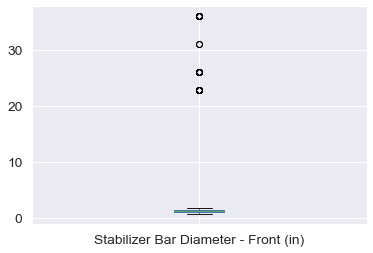

In [99]:
df1['Stabilizer Bar Diameter - Front (in)'].plot(kind= 'box')

In [100]:
# Above 2 inch is highly unlikely

df1.loc[df1['Stabilizer Bar Diameter - Front (in)']>2,
        'Stabilizer Bar Diameter - Front (in)'] = np.nan

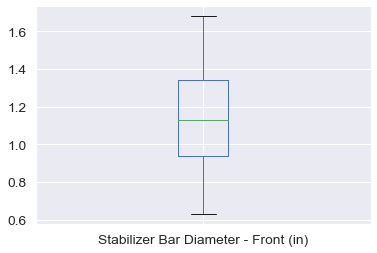

In [101]:
df1['Stabilizer Bar Diameter - Front (in)'].plot(kind= 'box')


In [102]:
df1['Stabilizer Bar Diameter - Front (in)'].unique()

array([  nan, 0.87 , 0.83 , 0.91 , 0.94 , 0.748, 0.787, 0.72 , 1.18 ,
       1.26 , 1.41 , 1.3  , 1.14 , 1.1  , 1.05 , 1.35 , 1.42 , 1.34 ,
       1.12 , 1.13 , 0.9  , 1.06 , 0.98 , 0.77 , 1.25 , 1.4  , 1.31 ,
       1.38 , 1.2  , 1.   , 1.08 , 1.22 , 1.36 , 1.04 , 1.02 , 1.259,
       1.299, 0.92 , 0.93 , 0.71 , 1.417, 1.33 , 1.142, 1.102, 0.81 ,
       0.75 , 0.79 , 1.07 , 0.68 , 0.66 , 0.67 , 0.95 , 0.63 , 0.944,
       0.866, 1.01 , 0.86 , 0.82 , 0.78 , 0.953, 1.68 ])

### Now working on Y/N type features :

- Let's convert them Y/N to 1 and 0 :

In [103]:
y_n = ['Air Bag-Frontal-Driver', 'Air Bag-Frontal-Passenger',
       'Air Bag-Passenger Switch (On/Off)', 'Air Bag-Side Body-Front',
       'Air Bag-Side Body-Rear', 'Air Bag-Side Head-Front',
       'Air Bag-Side Head-Rear', 'Brakes-ABS', 'Child Safety Rear Door Locks',
       'Daytime Running Lights', 'Traction Control', 'Night Vision',
       'Rollover Protection Bars', 'Fog Lamps', 'Parking Aid',
       'Tire Pressure Monitor', 'Back-Up Camera', 'Stability Control']

for i in y_n:
    df1[i] = df1[i].map({'Yes':1 , 'No':0})

In [104]:
df1['Corrosion Miles/km'] = df1['Corrosion Miles/km'].str.replace(",", "").str.replace("Unlimited", "150000")

df1['Corrosion Miles/km'] = df1['Corrosion Miles/km'].astype(float)

df1['Corrosion Miles/km'].value_counts()

150000.0    20800
100000.0     7401
50000.0      1105
60000.0         6
Name: Corrosion Miles/km, dtype: int64

In [105]:
df1['Drivetrain Miles/km'] = df1['Drivetrain Miles/km'].str.replace(",", "").str.replace("Unlimited", "150000")

df1['Drivetrain Miles/km'] = df1['Drivetrain Miles/km'].astype(float)

df1['Drivetrain Miles/km'].value_counts()

60000.0     12771
100000.0     6519
50000.0      4927
36000.0      2928
70000.0      1587
150000.0      410
24000.0       227
72000.0       137
80000.0        10
62139.0         6
120000.0        5
125000.0        1
Name: Drivetrain Miles/km, dtype: int64

In [106]:
df1['Basic Miles/km'] = df1['Basic Miles/km'].str.replace(",", "").str.replace("Unlimited", "150000")

df1['Basic Miles/km'] = df1['Basic Miles/km'].str.replace("49999", "50000")

df1['Basic Miles/km'] = df1['Basic Miles/km'].astype(float)

df1['Basic Miles/km'].value_counts()

36000.0     19862
50000.0      7152
60000.0      2278
150000.0      290
24000.0       255
100000.0      214
72000.0       137
49711.0         6
42000.0         5
Name: Basic Miles/km, dtype: int64

In [107]:
df1['Roadside Assistance Miles/km'] = df1['Roadside Assistance Miles/km'].str.replace(",", "").str.replace("Unlimited", "150000")

df1['Roadside Assistance Miles/km'] = df1['Roadside Assistance Miles/km'].str.replace("49711", "50000")

df1['Roadside Assistance Miles/km'] = df1['Roadside Assistance Miles/km'].str.replace("24000", "25000")

df1['Roadside Assistance Miles/km'] = df1['Roadside Assistance Miles/km'].astype(float)

df1['Roadside Assistance Miles/km'].value_counts()


36000.0     7286
150000.0    6164
60000.0     4636
100000.0    3608
50000.0     2502
70000.0      661
25000.0      436
Name: Roadside Assistance Miles/km, dtype: int64

In [108]:
df1['Drivetrain Years'] = df1['Drivetrain Years'].str.replace('Unlimited','20')

df1['Roadside Assistance Years'] = df1['Roadside Assistance Years'].str.replace('Unlimited','20')

In [109]:
df1.drop(columns=['EPA Classification' , 'Style Name' ,'Body Style' ,'Transmission','Steering Type','Brake Type'],inplace = True)

#### Let's Check the improvment in dataset :

In [110]:
df1.head()

,MSRP,EPA Fuel Economy Est - City (MPG),Engine,Drivetrain,Passenger Capacity,Passenger Doors,Base Curb Weight (lbs),Passenger Volume (ft³),Wheelbase (in),"Track Width, Front (in)","Height, Overall (in)","Fuel Tank Capacity, Approx (gal)",SAE Net Torque @ RPM,Fuel System,SAE Net Horsepower @ RPM,Displacement,Trans Description Cont.,Trans Type,Suspension Type - Front,Suspension Type - Rear,Air Bag-Frontal-Driver,Air Bag-Frontal-Passenger,Air Bag-Passenger Switch (On/Off),Air Bag-Side Body-Front,Air Bag-Side Body-Rear,Air Bag-Side Head-Front,Air Bag-Side Head-Rear,Brakes-ABS,Child Safety Rear Door Locks,Daytime Running Lights,Traction Control,Night Vision,Rollover Protection Bars,Fog Lamps,Parking Aid,Tire Pressure Monitor,Back-Up Camera,Stability Control,Basic Miles/km,Basic Years,Corrosion Miles/km,Corrosion Years,Drivetrain Miles/km,Drivetrain Years,Turning Diameter - Curb to Curb (ft),Front Wheel Material,Stabilizer Bar Diameter - Front (in),Roadside Assistance Years,Roadside Assistance Miles/km,Manufacturer,Model year,Category,Front tire width,Front tire aspect ratio,Front tire speed ratings/cons.type,Front tire rim size
0,40600.0,22.0,l4,FWD,5,4,3790.0,104.0,108.3,64.2,65.7,17.1,280.0,DI,272.0,2.0,Automatic,10,MacPherson Strut,Link type,1,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,50000.0,4.0,150000.0,5.0,70000.0,6.0,39.0,Aluminum,NaN,NaN,50000.0,Acura,2019,SUV,235,55,H,19
1,45500.0,22.0,l4,FWD,5,4,3829.0,104.0,108.3,64.2,65.7,17.1,280.0,DI,272.0,2.0,Automatic,10,MacPherson Strut,Link type,1,1,0,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,50000.0,4.0,150000.0,5.0,70000.0,6.0,39.0,Aluminum,NaN,NaN,50000.0,Acura,2019,SUV,235,55,H,19
2,43600.0,22.0,l4,FWD,5,4,3821.0,104.0,108.3,64.2,65.7,17.1,280.0,DI,272.0,2.0,Automatic,10,MacPherson Strut,Link type,1,1,0,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,50000.0,4.0,150000.0,5.0,70000.0,6.0,39.0,Aluminum,NaN,NaN,50000.0,Acura,2019,SUV,255,45,V,20
3,37400.0,22.0,l4,FWD,5,4,3783.0,104.0,108.3,64.2,65.7,17.1,280.0,DI,272.0,2.0,Automatic,10,MacPherson Strut,Link type,1,1,0,1,0,1,1,1,1,1,1,0,0,0,0,1,1,1,50000.0,4.0,150000.0,5.0,70000.0,6.0,39.0,Aluminum,NaN,NaN,50000.0,Acura,2019,SUV,235,55,H,19
4,42600.0,21.0,l4,AWD,5,4,4026.0,104.0,108.3,64.2,65.7,17.1,280.0,DI,272.0,2.0,Automatic,10,MacPherson Strut,Link type,1,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,50000.0,4.0,150000.0,5.0,70000.0,6.0,39.0,Aluminum,NaN,NaN,50000.0,Acura,2019,SUV,235,55,H,19


In [111]:
#df1.to_csv('New_cars_cleaned.csv',index=False)

### Let's treat the missing values :

In [112]:
missing_values(df1)

,Features,Count,Percentage Missing(%)
0,MSRP,54,0.167100
1,Category,1716,5.310063
2,Drivetrain,1716,5.310063
3,Engine,1975,6.111524
4,Trans Type,1981,6.130090
5,Front Wheel Material,1983,6.136279
6,Front tire aspect ratio,2012,6.226018
7,SAE Net Horsepower @ RPM,2014,6.232207
8,Wheelbase (in),2015,6.235301
9,SAE Net Torque @ RPM,2067,6.396212


- Category columns that needs to be imputed :

In [113]:
cat_col_imp = ['Drivetrain' , 'Category' , 'Engine' , 'Trans Type']

#### Dropping Rows
- The rows in which price and category were missing are removed.

In [114]:
df1.dropna(axis=0 , how = 'any' , subset=['MSRP','Drivetrain'] , inplace=True)
df1[['MSRP' , 'Drivetrain']].isnull().sum()

MSRP          0
Drivetrain    0
dtype: int64

#### Engine
- Imputing the missing engine values by taking the most occurrent value after grouping them together by their manufacturer and category.

In [115]:
df1['Engine'].isna().sum()

258

In [116]:
df1['Engine'].unique()

array(['l4', 'V6', nan, 'V12', 'V8', 'Electric', 'V10', 'l5', 'W12', 'l6',
       'I6', 'Flat', 'l3', 'W8'], dtype=object)

In [117]:
#Imuting missing values in egnine by grouping them by manufacturer and category wise

df1['Engine'] = df1['Engine'].fillna(df1.groupby(['Manufacturer', 'Category'])['Engine'].transform(lambda x: x.value_counts().idxmax()))

#### Transmission type (No of gears) :

In [118]:
# Trans type

df1['Trans Type'].value_counts(dropna=False)

6      11420
5       7459
4       4663
8       3000
<3      1663
7       1374
9        487
NaN      265
10       193
CVT       22
Name: Trans Type, dtype: int64

In [119]:
##Imuting missing values in transmission type by grouping them by manufacturer and engine wise

df1['Trans Type'] = df1['Trans Type'].fillna(df1.groupby(['Manufacturer','Category','Engine'])['Trans Type'].transform(lambda x: x.value_counts().idxmax()))

#### Type of transmission used :

In [120]:
df1['Trans Description Cont.'].value_counts(dropna= False)

Automatic    19063
Manual        9566
CVT           1596
NA             321
Name: Trans Description Cont., dtype: int64

In [121]:
df1['Trans Description Cont.'] = df1['Trans Description Cont.'].fillna(df1.groupby(['Manufacturer','Category','Engine'])['Trans Description Cont.'].transform(lambda x: x.value_counts().idxmax()))

#### Fuel System :

In [122]:
df1['Fuel System'].value_counts(dropna=False)

SFI            12561
DI             10600
Electric FI     6275
NaN             1110
Name: Fuel System, dtype: int64

In [123]:
df['Fuel System'] = df['Fuel System'].fillna('Unknown')

### Remaining columns that has to be imputed :

In [124]:
df1.columns

Index(['MSRP', 'EPA Fuel Economy Est - City (MPG)', 'Engine', 'Drivetrain',
       'Passenger Capacity', 'Passenger Doors', 'Base Curb Weight (lbs)',
       'Passenger Volume (ft³)', 'Wheelbase (in)', 'Track Width, Front (in)',
       'Height, Overall (in)', 'Fuel Tank Capacity, Approx (gal)',
       'SAE Net Torque @ RPM', 'Fuel System', 'SAE Net Horsepower @ RPM',
       'Displacement', 'Trans Description Cont.', 'Trans Type',
       'Suspension Type - Front', 'Suspension Type - Rear',
       'Air Bag-Frontal-Driver', 'Air Bag-Frontal-Passenger',
       'Air Bag-Passenger Switch (On/Off)', 'Air Bag-Side Body-Front',
       'Air Bag-Side Body-Rear', 'Air Bag-Side Head-Front',
       'Air Bag-Side Head-Rear', 'Brakes-ABS', 'Child Safety Rear Door Locks',
       'Daytime Running Lights', 'Traction Control', 'Night Vision',
       'Rollover Protection Bars', 'Fog Lamps', 'Parking Aid',
       'Tire Pressure Monitor', 'Back-Up Camera', 'Stability Control',
       'Basic Miles/km', 'Basic 

In [125]:
num_col_imp = ['EPA Fuel Economy Est - City (MPG)', 'Base Curb Weight (lbs)',
               'Passenger Volume (ft³)', 'Wheelbase (in)', 'Track Width, Front (in)',
               'Height, Overall (in)', 'Fuel Tank Capacity, Approx (gal)',
               'SAE Net Torque @ RPM', 'Fuel System', 'SAE Net Horsepower @ RPM',
               'Displacement', 'Basic Miles/km',
               'Basic Years', 'Corrosion Miles/km', 'Corrosion Years',
               'Drivetrain Miles/km', 'Drivetrain Years',
               'Turning Diameter - Curb to Curb (ft)']

#### One hot Encoding all categorical columns :

In [126]:
#One hot encoding
#If a category has more than 300 values then a new column is created

cat_col = ['Engine' , 'Drivetrain' , 'Trans Description Cont.' , 'Fuel System','Suspension Type - Front',
           'Trans Type','Suspension Type - Rear','Manufacturer','Category','Front Wheel Material','Front tire speed ratings/cons.type']
print('The Encoding is applied for: ')
for col in cat_col:
    freqs=df1[col].value_counts()
    k=freqs.index[freqs>300]
    for cat in k:
        name=col+'_'+cat
        df1[name]=(df1[col]==cat).astype(int)
    del df1[col]
    print(col)

The Encoding is applied for: 
Engine
Drivetrain
Trans Description Cont.
Fuel System
Suspension Type - Front
Trans Type
Suspension Type - Rear
Manufacturer
Category
Front Wheel Material
Front tire speed ratings/cons.type


In [127]:
df1.head(10)

,MSRP,EPA Fuel Economy Est - City (MPG),Passenger Capacity,Passenger Doors,Base Curb Weight (lbs),Passenger Volume (ft³),Wheelbase (in),"Track Width, Front (in)","Height, Overall (in)","Fuel Tank Capacity, Approx (gal)",SAE Net Torque @ RPM,SAE Net Horsepower @ RPM,Displacement,Air Bag-Frontal-Driver,Air Bag-Frontal-Passenger,Air Bag-Passenger Switch (On/Off),Air Bag-Side Body-Front,Air Bag-Side Body-Rear,Air Bag-Side Head-Front,Air Bag-Side Head-Rear,Brakes-ABS,Child Safety Rear Door Locks,Daytime Running Lights,Traction Control,Night Vision,Rollover Protection Bars,Fog Lamps,Parking Aid,Tire Pressure Monitor,Back-Up Camera,Stability Control,Basic Miles/km,Basic Years,Corrosion Miles/km,Corrosion Years,Drivetrain Miles/km,Drivetrain Years,Turning Diameter - Curb to Curb (ft),Stabilizer Bar Diameter - Front (in),Roadside Assistance Years,Roadside Assistance Miles/km,Model year,Front tire width,Front tire aspect ratio,Front tire rim size,Engine_l4,Engine_V8,Engine_V6,Engine_Flat,Engine_I6,Engine_l5,Drivetrain_RWD,Drivetrain_FWD,Drivetrain_4WD,Drivetrain_AWD,Trans Description Cont._Automatic,Trans Description Cont._Manual,Trans Description Cont._CVT,Trans Description Cont._NA,Fuel System_SFI,Fuel System_DI,Fuel System_Electric FI,Suspension Type - Front_MacPherson Strut,Suspension Type - Front_Double Wishbone,Suspension Type - Front_Independent,Suspension Type - Front_Coil Spring,Suspension Type - Front_Link type,Suspension Type - Front_Torsion Bar,Suspension Type - Front_Others,Trans Type_6,Trans Type_5,Trans Type_4,Trans Type_8,Trans Type_<3,Trans Type_7,Trans Type_9,Suspension Type - Rear_Link type,Suspension Type - Rear_Leaf type,Suspension Type - Rear_Independent,Suspension Type - Rear_Double Wishbone,Suspension Type - Rear_Torsion Bar,Suspension Type - Rear_Others,Suspension Type - Rear_Coil Spring,Suspension Type - Rear_MacPherson Strut,Suspension Type - Rear_Axle,Manufacturer_Ford,Manufacturer_Chevrolet,Manufacturer_Toyota,Manufacturer_Nissan,Manufacturer_GMC,Manufacturer_Honda,Manufacturer_Volkswagen,Manufacturer_Subaru,Manufacturer_BMW,Manufacturer_Audi,Manufacturer_Ram,Manufacturer_Hyundai,Manufacturer_Mercedes-Benz,Manufacturer_Mazda,Manufacturer_Kia,Manufacturer_Jeep,Manufacturer_Cadillac,Manufacturer_Porsche,Manufacturer_Volvo,Manufacturer_Dodge,Manufacturer_Jaguar,Manufacturer_Buick,Manufacturer_Acura,Category_Car,Category_Pickup,Category_SUV,Category_Van,Front Wheel Material_Aluminum,Front Wheel Material_Steel,Front Wheel Material_Alloy,Front tire speed ratings/cons.type_R,Front tire speed ratings/cons.type_H,Front tire speed ratings/cons.type_NA,Front tire speed ratings/cons.type_V,Front tire speed ratings/cons.type_T,Front tire speed ratings/cons.type_Z
0,40600.0,22.0,5,4,3790.0,104.0,108.3,64.2,65.7,17.1,280.0,272.0,2.0,1,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,50000.0,4.0,150000.0,5.0,70000.0,6.0,39.0,NaN,NaN,50000.0,2019,235,55,19,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0
1,45500.0,22.0,5,4,3829.0,104.0,108.3,64.2,65.7,17.1,280.0,272.0,2.0,1,1,0,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,50000.0,4.0,150000.0,5.0,70000.0,6.0,39.0,NaN,NaN,50000.0,2019,235,55,19,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0
2,43600.0,22.0,5,4,3821.0,104.0,108.3,64.2,65.7,17.1,280.0,272.0,2.0,1,1,0,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,50000.0,4.0,150000.0,5.0,70000.0,6.0,39.0,NaN,NaN,50000.0,2019,255,45,20,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0
3,37400.0,22.0,5,4,3783.0,104.0,108.3,64.2,65.7,17.1,280.0,272.0,2.0,1,1,0,1,0,1,1,1,1,1,1,0,0,0,0,1,1,1,50000.0,4.0,150000.0,5.0,70000.0,6.0,39.0,NaN,NaN,50000.0,2019,235,55,19,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [128]:
for i in list(df1.columns[df1.dtypes == 'O']):
    df1[i] = pd.to_numeric(df1[i],errors='coerce')

In [129]:
df1.shape

(30546, 121)

In [130]:
df1.isnull().sum()

MSRP                                            0
EPA Fuel Economy Est - City (MPG)            3556
Passenger Capacity                              0
Passenger Doors                                 0
Base Curb Weight (lbs)                      11137
Passenger Volume (ft³)                      13828
Wheelbase (in)                                299
Track Width, Front (in)                     10469
Height, Overall (in)                        14927
Fuel Tank Capacity, Approx (gal)            14939
SAE Net Torque @ RPM                          351
SAE Net Horsepower @ RPM                      298
Displacement                                  426
Air Bag-Frontal-Driver                          0
Air Bag-Frontal-Passenger                       0
Air Bag-Passenger Switch (On/Off)               0
Air Bag-Side Body-Front                         0
Air Bag-Side Body-Rear                          0
Air Bag-Side Head-Front                         0
Air Bag-Side Head-Rear                          0


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=100, random_state=2)
imp.fit(df3)
IterativeImputer(random_state=0)

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10000)
imputer.fit_transform(df3)

In [131]:
df1['Wheelbase (in)'].fillna(method='ffill')

0        108.3
1        108.3
2        108.3
3        108.3
4        108.3
         ...  
32311    109.2
32312    109.3
32313    109.3
32314    109.3
32315    109.3
Name: Wheelbase (in), Length: 30546, dtype: float64

In [132]:
df1['Wheelbase (in)'].isnull().sum()

299

In [133]:
#df3['Wheelbase (in)'].unique()

Manufacturer = ['Manufacturer_Ford',                              
'Manufacturer_Chevrolet',                         
'Manufacturer_Toyota',                            
'Manufacturer_Nissan',                            
'Manufacturer_GMC',                               
'Manufacturer_Honda',                             
'Manufacturer_Volkswagen',                        
'Manufacturer_Subaru',                            
'Manufacturer_BMW',                               
'Manufacturer_Audi',                              
'Manufacturer_Ram',                               
'Manufacturer_Hyundai',                           
'Manufacturer_Mercedes-Benz',                     
'Manufacturer_Mazda',                             
'Manufacturer_Kia',                               
'Manufacturer_Jeep',                              
'Manufacturer_Cadillac',                          
'Manufacturer_Porsche',                           
'Manufacturer_Volvo',                             
'Manufacturer_Dodge',                             
'Manufacturer_Jaguar',                            
'Manufacturer_Buick',                             
'Manufacturer_Acura']

- my doubt :
1. how to remove/fill up missing values. because i tried so many techniques but didn't work.
2. while deploy in heroku exact what features shall i consider.? like there are 50+ features.
3. in some cases i can't fill up NA values or can

### We will make a final Dataset for further Analysis :

#### Here I fetch the important features of the Car :

In [134]:
data = df1[['MSRP','EPA Fuel Economy Est - City (MPG)','Passenger Capacity','Passenger Doors',
           'Wheelbase (in)','SAE Net Torque @ RPM','SAE Net Horsepower @ RPM','Displacement',
            'Air Bag-Frontal-Driver','Air Bag-Frontal-Passenger','Air Bag-Passenger Switch (On/Off)',
            'Air Bag-Side Body-Front','Air Bag-Side Body-Rear','Air Bag-Side Head-Front',
            'Air Bag-Side Head-Rear','Brakes-ABS','Child Safety Rear Door Locks',
            'Daytime Running Lights','Traction Control','Night Vision','Rollover Protection Bars',
            'Fog Lamps','Parking Aid','Tire Pressure Monitor','Back-Up Camera','Stability Control','Basic Miles/km','Basic Years',
           'Model year','Front tire aspect ratio','Engine_l4','Engine_V8','Engine_V6','Engine_Flat','Engine_I6','Engine_l5',
            'Drivetrain_RWD','Drivetrain_FWD','Drivetrain_4WD','Drivetrain_AWD','Trans Description Cont._Automatic',
            'Trans Description Cont._Manual','Trans Description Cont._CVT','Trans Description Cont._NA',
            'Fuel System_SFI','Fuel System_DI','Fuel System_Electric FI','Suspension Type - Front_MacPherson Strut',
            'Suspension Type - Front_Double Wishbone','Suspension Type - Front_Independent',
            'Suspension Type - Front_Coil Spring','Suspension Type - Front_Link type','Suspension Type - Front_Torsion Bar',
            'Suspension Type - Front_Others',
            'Trans Type_6','Trans Type_5','Trans Type_4','Trans Type_8','Trans Type_<3','Trans Type_7','Trans Type_9',
            'Suspension Type - Rear_Link type','Suspension Type - Rear_Leaf type','Suspension Type - Rear_Independent',
            'Suspension Type - Rear_Double Wishbone','Suspension Type - Rear_Torsion Bar','Suspension Type - Rear_Others',
            'Suspension Type - Rear_Coil Spring','Suspension Type - Rear_MacPherson Strut','Suspension Type - Rear_Axle',
            'Manufacturer_Ford','Manufacturer_Chevrolet','Manufacturer_Toyota','Manufacturer_Nissan','Manufacturer_GMC',
            'Manufacturer_Honda','Manufacturer_Volkswagen','Manufacturer_Subaru','Manufacturer_BMW','Manufacturer_Audi',
            'Manufacturer_Ram','Manufacturer_Hyundai','Manufacturer_Mercedes-Benz','Manufacturer_Mazda','Manufacturer_Kia',
            'Manufacturer_Jeep','Manufacturer_Cadillac','Manufacturer_Porsche','Manufacturer_Volvo','Manufacturer_Dodge',
            'Manufacturer_Jaguar','Manufacturer_Buick','Manufacturer_Acura','Category_Car','Category_Pickup','Category_SUV'
            ,'Category_Van','Front Wheel Material_Aluminum','Front Wheel Material_Steel','Front Wheel Material_Alloy',
            'Front tire speed ratings/cons.type_R','Front tire speed ratings/cons.type_H',
            'Front tire speed ratings/cons.type_NA','Front tire speed ratings/cons.type_V',
            'Front tire speed ratings/cons.type_T','Front tire speed ratings/cons.type_Z']]
data.head()

,MSRP,EPA Fuel Economy Est - City (MPG),Passenger Capacity,Passenger Doors,Wheelbase (in),SAE Net Torque @ RPM,SAE Net Horsepower @ RPM,Displacement,Air Bag-Frontal-Driver,Air Bag-Frontal-Passenger,Air Bag-Passenger Switch (On/Off),Air Bag-Side Body-Front,Air Bag-Side Body-Rear,Air Bag-Side Head-Front,Air Bag-Side Head-Rear,Brakes-ABS,Child Safety Rear Door Locks,Daytime Running Lights,Traction Control,Night Vision,Rollover Protection Bars,Fog Lamps,Parking Aid,Tire Pressure Monitor,Back-Up Camera,Stability Control,Basic Miles/km,Basic Years,Model year,Front tire aspect ratio,Engine_l4,Engine_V8,Engine_V6,Engine_Flat,Engine_I6,Engine_l5,Drivetrain_RWD,Drivetrain_FWD,Drivetrain_4WD,Drivetrain_AWD,Trans Description Cont._Automatic,Trans Description Cont._Manual,Trans Description Cont._CVT,Trans Description Cont._NA,Fuel System_SFI,Fuel System_DI,Fuel System_Electric FI,Suspension Type - Front_MacPherson Strut,Suspension Type - Front_Double Wishbone,Suspension Type - Front_Independent,Suspension Type - Front_Coil Spring,Suspension Type - Front_Link type,Suspension Type - Front_Torsion Bar,Suspension Type - Front_Others,Trans Type_6,Trans Type_5,Trans Type_4,Trans Type_8,Trans Type_<3,Trans Type_7,Trans Type_9,Suspension Type - Rear_Link type,Suspension Type - Rear_Leaf type,Suspension Type - Rear_Independent,Suspension Type - Rear_Double Wishbone,Suspension Type - Rear_Torsion Bar,Suspension Type - Rear_Others,Suspension Type - Rear_Coil Spring,Suspension Type - Rear_MacPherson Strut,Suspension Type - Rear_Axle,Manufacturer_Ford,Manufacturer_Chevrolet,Manufacturer_Toyota,Manufacturer_Nissan,Manufacturer_GMC,Manufacturer_Honda,Manufacturer_Volkswagen,Manufacturer_Subaru,Manufacturer_BMW,Manufacturer_Audi,Manufacturer_Ram,Manufacturer_Hyundai,Manufacturer_Mercedes-Benz,Manufacturer_Mazda,Manufacturer_Kia,Manufacturer_Jeep,Manufacturer_Cadillac,Manufacturer_Porsche,Manufacturer_Volvo,Manufacturer_Dodge,Manufacturer_Jaguar,Manufacturer_Buick,Manufacturer_Acura,Category_Car,Category_Pickup,Category_SUV,Category_Van,Front Wheel Material_Aluminum,Front Wheel Material_Steel,Front Wheel Material_Alloy,Front tire speed ratings/cons.type_R,Front tire speed ratings/cons.type_H,Front tire speed ratings/cons.type_NA,Front tire speed ratings/cons.type_V,Front tire speed ratings/cons.type_T,Front tire speed ratings/cons.type_Z
0,40600.0,22.0,5,4,108.3,280.0,272.0,2.0,1,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,50000.0,4.0,2019,55.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0
1,45500.0,22.0,5,4,108.3,280.0,272.0,2.0,1,1,0,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,50000.0,4.0,2019,55.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0
2,43600.0,22.0,5,4,108.3,280.0,272.0,2.0,1,1,0,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,50000.0,4.0,2019,45.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0
3,37400.0,22.0,5,4,108.3,280.0,272.0,2.0,1,1,0,1,0,1,1,1,1,1,1,0,0,0,0,1,1,1,50000.0,4.0,2019,55.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0
4,42600.0,21.0,5,4,108.3,280.0,272.0,2.0,1,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,50000.0,4.0,2019,55.0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0


In [135]:
data.isnull().sum()

MSRP                                           0
EPA Fuel Economy Est - City (MPG)           3556
Passenger Capacity                             0
Passenger Doors                                0
Wheelbase (in)                               299
SAE Net Torque @ RPM                         351
SAE Net Horsepower @ RPM                     298
Displacement                                 426
Air Bag-Frontal-Driver                         0
Air Bag-Frontal-Passenger                      0
Air Bag-Passenger Switch (On/Off)              0
Air Bag-Side Body-Front                        0
Air Bag-Side Body-Rear                         0
Air Bag-Side Head-Front                        0
Air Bag-Side Head-Rear                         0
Brakes-ABS                                     0
Child Safety Rear Door Locks                   0
Daytime Running Lights                         0
Traction Control                               0
Night Vision                                   0
Rollover Protection 

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30546 entries, 0 to 32315
Columns: 106 entries, MSRP to Front tire speed ratings/cons.type_Z
dtypes: float64(9), int32(76), int64(21)
memory usage: 16.1 MB


In [137]:
data.shape

(30546, 106)

In [138]:
#data['EPA Fuel Economy Est - City (MPG)'].mean()
data['EPA Fuel Economy Est - City (MPG)'].fillna(data['EPA Fuel Economy Est - City (MPG)'].mean(),inplace = True)

In [140]:
data['Wheelbase (in)'].fillna(data['Wheelbase (in)'].mean(),inplace = True)

In [141]:
data['SAE Net Torque @ RPM'].fillna(data['SAE Net Torque @ RPM'].mean(),inplace = True)

In [142]:
data['SAE Net Horsepower @ RPM'].fillna(data['SAE Net Horsepower @ RPM'].mean(),inplace = True)

In [143]:
data['Displacement'].fillna(data['Displacement'].mean(),inplace = True)

In [145]:
data['Basic Miles/km'].fillna(data['Basic Miles/km'].mean(),inplace = True)
data['Basic Years'].fillna(data['Basic Years'].mean(),inplace = True)
data['Front tire aspect ratio'].fillna(data['Front tire aspect ratio'].mean(),inplace = True)

In [146]:
data.isnull().sum()

MSRP                                        0
EPA Fuel Economy Est - City (MPG)           0
Passenger Capacity                          0
Passenger Doors                             0
Wheelbase (in)                              0
SAE Net Torque @ RPM                        0
SAE Net Horsepower @ RPM                    0
Displacement                                0
Air Bag-Frontal-Driver                      0
Air Bag-Frontal-Passenger                   0
Air Bag-Passenger Switch (On/Off)           0
Air Bag-Side Body-Front                     0
Air Bag-Side Body-Rear                      0
Air Bag-Side Head-Front                     0
Air Bag-Side Head-Rear                      0
Brakes-ABS                                  0
Child Safety Rear Door Locks                0
Daytime Running Lights                      0
Traction Control                            0
Night Vision                                0
Rollover Protection Bars                    0
Fog Lamps                         

### Let's split the dataset into train and test  :

In [153]:
data.head()

,MSRP,EPA Fuel Economy Est - City (MPG),Passenger Capacity,Passenger Doors,Wheelbase (in),SAE Net Torque @ RPM,SAE Net Horsepower @ RPM,Displacement,Air Bag-Frontal-Driver,Air Bag-Frontal-Passenger,Air Bag-Passenger Switch (On/Off),Air Bag-Side Body-Front,Air Bag-Side Body-Rear,Air Bag-Side Head-Front,Air Bag-Side Head-Rear,Brakes-ABS,Child Safety Rear Door Locks,Daytime Running Lights,Traction Control,Night Vision,Rollover Protection Bars,Fog Lamps,Parking Aid,Tire Pressure Monitor,Back-Up Camera,Stability Control,Basic Miles/km,Basic Years,Model year,Front tire aspect ratio,Engine_l4,Engine_V8,Engine_V6,Engine_Flat,Engine_I6,Engine_l5,Drivetrain_RWD,Drivetrain_FWD,Drivetrain_4WD,Drivetrain_AWD,Trans Description Cont._Automatic,Trans Description Cont._Manual,Trans Description Cont._CVT,Trans Description Cont._NA,Fuel System_SFI,Fuel System_DI,Fuel System_Electric FI,Suspension Type - Front_MacPherson Strut,Suspension Type - Front_Double Wishbone,Suspension Type - Front_Independent,Suspension Type - Front_Coil Spring,Suspension Type - Front_Link type,Suspension Type - Front_Torsion Bar,Suspension Type - Front_Others,Trans Type_6,Trans Type_5,Trans Type_4,Trans Type_8,Trans Type_<3,Trans Type_7,Trans Type_9,Suspension Type - Rear_Link type,Suspension Type - Rear_Leaf type,Suspension Type - Rear_Independent,Suspension Type - Rear_Double Wishbone,Suspension Type - Rear_Torsion Bar,Suspension Type - Rear_Others,Suspension Type - Rear_Coil Spring,Suspension Type - Rear_MacPherson Strut,Suspension Type - Rear_Axle,Manufacturer_Ford,Manufacturer_Chevrolet,Manufacturer_Toyota,Manufacturer_Nissan,Manufacturer_GMC,Manufacturer_Honda,Manufacturer_Volkswagen,Manufacturer_Subaru,Manufacturer_BMW,Manufacturer_Audi,Manufacturer_Ram,Manufacturer_Hyundai,Manufacturer_Mercedes-Benz,Manufacturer_Mazda,Manufacturer_Kia,Manufacturer_Jeep,Manufacturer_Cadillac,Manufacturer_Porsche,Manufacturer_Volvo,Manufacturer_Dodge,Manufacturer_Jaguar,Manufacturer_Buick,Manufacturer_Acura,Category_Car,Category_Pickup,Category_SUV,Category_Van,Front Wheel Material_Aluminum,Front Wheel Material_Steel,Front Wheel Material_Alloy,Front tire speed ratings/cons.type_R,Front tire speed ratings/cons.type_H,Front tire speed ratings/cons.type_NA,Front tire speed ratings/cons.type_V,Front tire speed ratings/cons.type_T,Front tire speed ratings/cons.type_Z
0,40600.0,22.0,5,4,108.3,280.0,272.0,2.0,1,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,50000.0,4.0,2019,55.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0
1,45500.0,22.0,5,4,108.3,280.0,272.0,2.0,1,1,0,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,50000.0,4.0,2019,55.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0
2,43600.0,22.0,5,4,108.3,280.0,272.0,2.0,1,1,0,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,50000.0,4.0,2019,45.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0
3,37400.0,22.0,5,4,108.3,280.0,272.0,2.0,1,1,0,1,0,1,1,1,1,1,1,0,0,0,0,1,1,1,50000.0,4.0,2019,55.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0
4,42600.0,21.0,5,4,108.3,280.0,272.0,2.0,1,1,0,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,50000.0,4.0,2019,55.0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0


In [154]:
X

array([[22.,  5.,  4., ...,  0.,  0.,  0.],
       [22.,  5.,  4., ...,  0.,  0.,  0.],
       [22.,  5.,  4., ...,  1.,  0.,  0.],
       ...,
       [20.,  5.,  4., ...,  1.,  0.,  0.],
       [20.,  5.,  4., ...,  1.,  0.,  0.],
       [20.,  5.,  4., ...,  1.,  0.,  0.]])

In [155]:
y

array([[40600.],
       [45500.],
       [43600.],
       ...,
       [44850.],
       [41000.],
       [44650.]])

In [156]:
X.shape, y.shape

((30546, 105), (30546, 1))

In [174]:
# Linear Regression :
from sklearn.model_selection import train_test_split

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size = 0.3, 
                                                    random_state = 0)

In [175]:
y_test_lr.shape , X_test_lr.shape

((9164, 1), (9164, 105))

In [176]:
# Train the linear regression model on the Training set

from sklearn.linear_model import LinearRegression
regressor_LR = LinearRegression()
regressor_LR.fit(X_train_lr, y_train_lr)

LinearRegression()

In [177]:
### prediction on train dataset:

y_pred_lr = regressor_LR.predict(X_test_lr)
np.set_printoptions(precision=2)

In [178]:
from sklearn.metrics import r2_score
print('R-sqr score :',r2_score(y_test_lr, y_pred_lr)*100)

R-sqr score : 81.74461731055361


Text(0.5, 1.0, 'Residual plot')

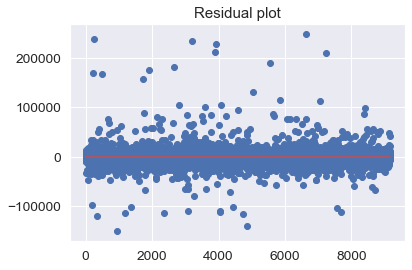

In [166]:
x = [i for i in range(1, len(y_pred_lr)+1)]
x_plot = plt.scatter(x,(y_test_lr - y_pred_lr), c='b')
plt.plot(x,[0]*len(y_pred_lr), c='r')
plt.title('Residual plot')

In [167]:
# Random Forest 
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size = 0.3, 
                                                                random_state = 0)

In [168]:
X_train_rf.shape, X_test_rf.shape, y_train_rf.shape, y_test_rf.shape

((21382, 105), (9164, 105), (21382, 1), (9164, 1))

In [179]:
from sklearn.ensemble import RandomForestRegressor
regressor_RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_RF.fit(X_train_rf, y_train_rf)

RandomForestRegressor(n_estimators=10, random_state=0)

In [180]:
y_pred_rf = regressor_RF.predict(X_test_rf)
np.set_printoptions(precision=2)

In [181]:
from sklearn.metrics import r2_score, mean_squared_error

print('RMSE :',np.sqrt(mean_squared_error(y_test_rf, y_pred_rf)))

print('R-sqr score :',r2_score(y_test_rf, y_pred_rf)*100)

RMSE : 4261.842182269681
R-sqr score : 98.36921603975452


In [184]:
# we can check here predicted values with test values :

final_result = pd.DataFrame((np.concatenate((y_pred_rf.reshape(len(y_pred_rf),1), y_test_rf.reshape(len(y_test_rf),1)),1)))
final_result.head()

,0,1
0,24350.800000,24300.0
1,27924.500000,26000.0
2,45146.500000,46195.0
3,33478.333333,33060.0
4,17872.500000,22205.0
